In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Firm_level_data.csv')

# Display the first few rows
print(data.head())


   Unnamed: 0        sales      capital  patents        randd  employment  \
0           0   826.995050   161.603986       10   382.078247    2.306000   
1           1   407.753973   122.101012        2     0.000000    1.860000   
2           2  8407.845588  6221.144614      138  3296.700439   49.659005   
3           3   451.000010   266.899987        1    83.540161    3.071000   
4           4   174.927981   140.124004        2    14.233637    1.947000   

  sp500     tobinq         value  institutions  
0    no  11.049511   1625.453755         80.27  
1    no   0.844187    243.117082         59.02  
2   yes   5.205257  25865.233800         47.70  
3    no   0.305221     63.024630         26.88  
4    no   1.063300     67.406408         49.46  


In [2]:
# Check the shape of the dataset
print(f'Shape of the dataset: {data.shape}')

# Check data types of each column
print(data.dtypes)


Shape of the dataset: (759, 10)
Unnamed: 0        int64
sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object


In [3]:
# Get a statistical summary of the dataset
print(data.describe())


       Unnamed: 0          sales       capital      patents         randd  \
count  759.000000     759.000000    759.000000   759.000000    759.000000   
mean   379.000000    2689.705158   1977.747498    25.831357    439.938074   
std    219.248717    8722.060124   6466.704896    97.259577   2007.397588   
min      0.000000       0.138000      0.057000     0.000000      0.000000   
25%    189.500000     122.920000     52.650501     1.000000      4.628262   
50%    379.000000     448.577082    202.179023     3.000000     36.864136   
75%    568.500000    1822.547366   1075.790020    11.500000    143.253403   
max    758.000000  135696.788200  93625.200560  1220.000000  30425.255860   

       employment      tobinq         value  institutions  
count  759.000000  738.000000    759.000000    759.000000  
mean    14.164519    2.794910   2732.734750     43.020540  
std     43.321443    3.366591   7071.072362     21.685586  
min      0.006000    0.119001      1.971053      0.000000  
25%   

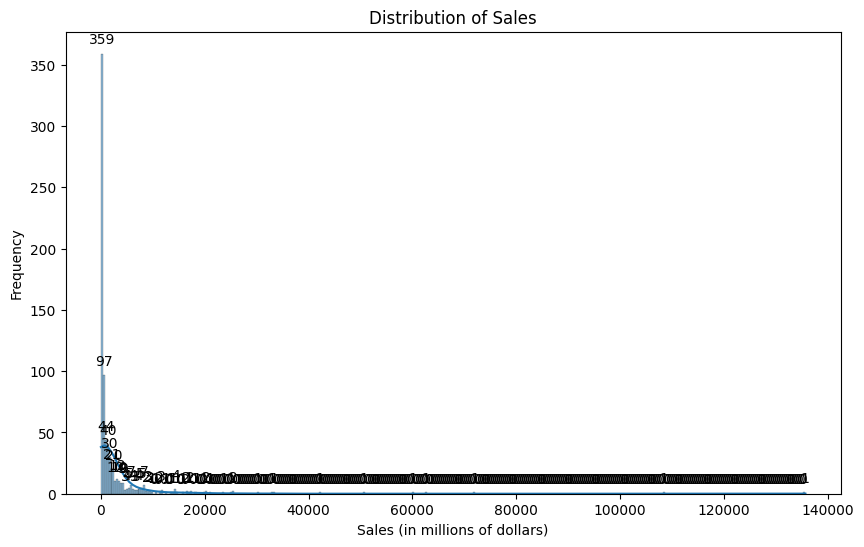

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for sales with annotations
plt.figure(figsize=(10, 6))
plot = sns.histplot(data['sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales (in millions of dollars)')
plt.ylabel('Frequency')

# Add value annotations
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points')

plt.show()


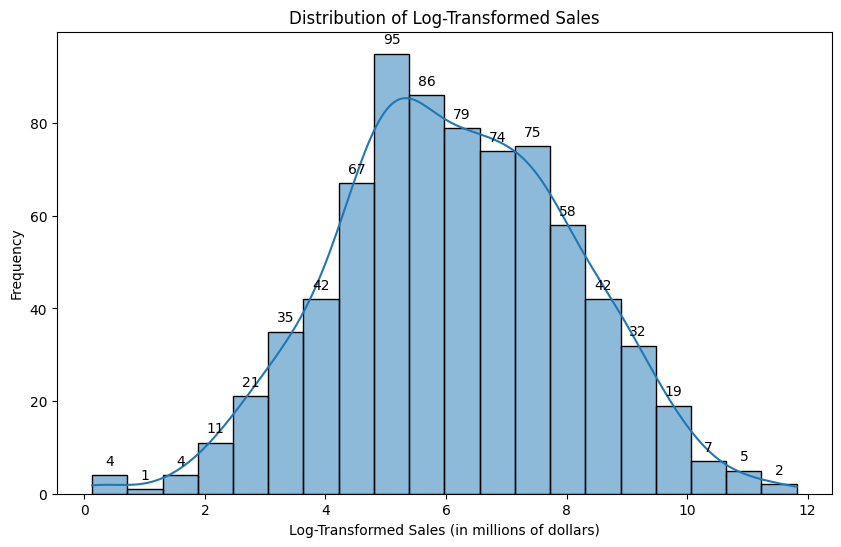

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply log transformation to sales
data['log_sales'] = np.log1p(data['sales'])

# Distribution plot for log-transformed sales with annotations
plt.figure(figsize=(10, 6))
plot = sns.histplot(data['log_sales'], kde=True)
plt.title('Distribution of Log-Transformed Sales')
plt.xlabel('Log-Transformed Sales (in millions of dollars)')
plt.ylabel('Frequency')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points')
plt.show()


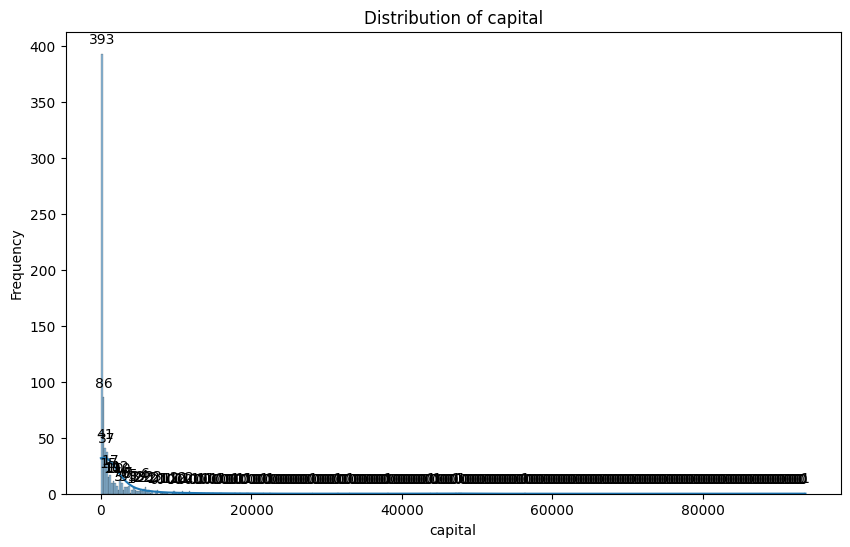

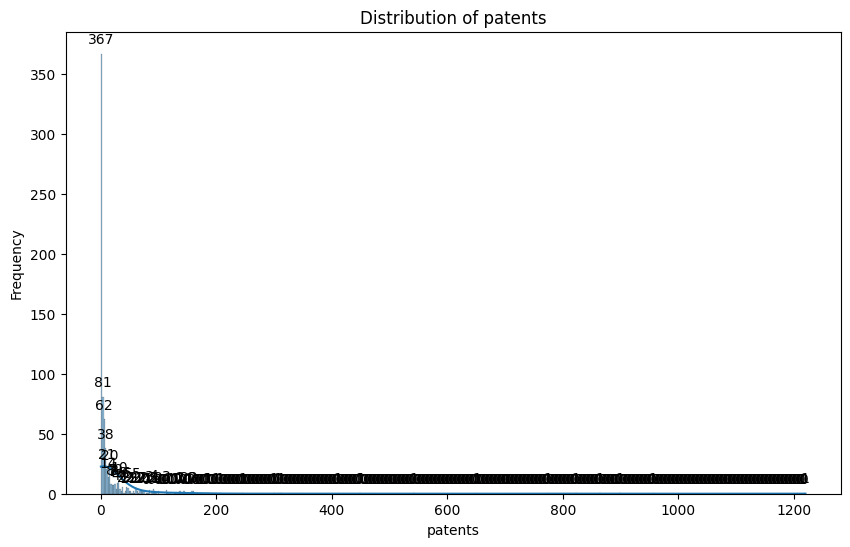

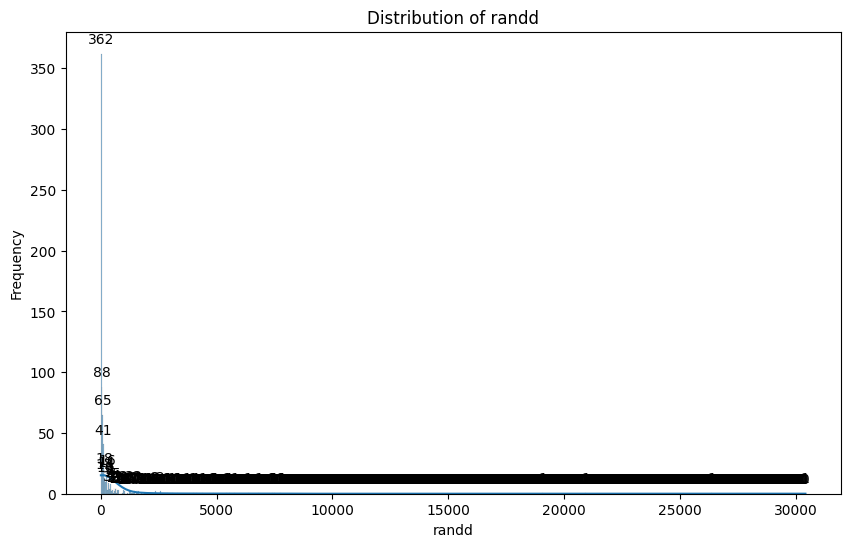

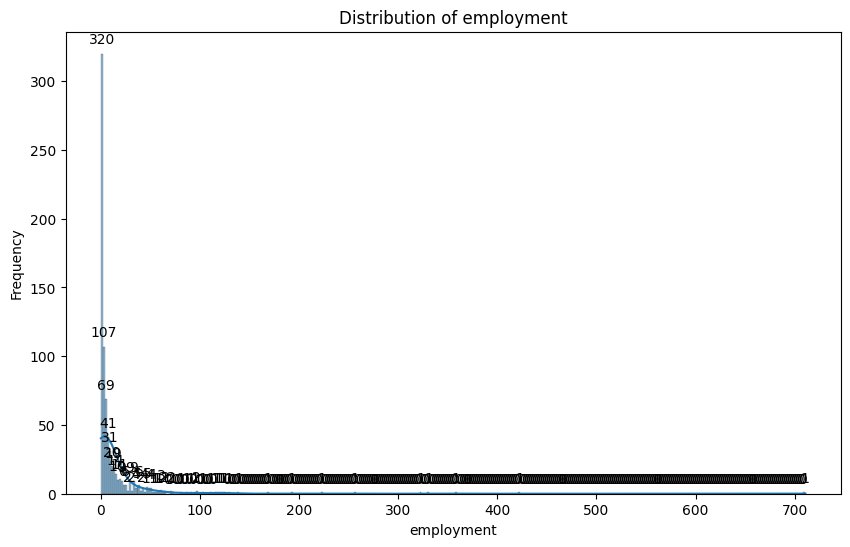

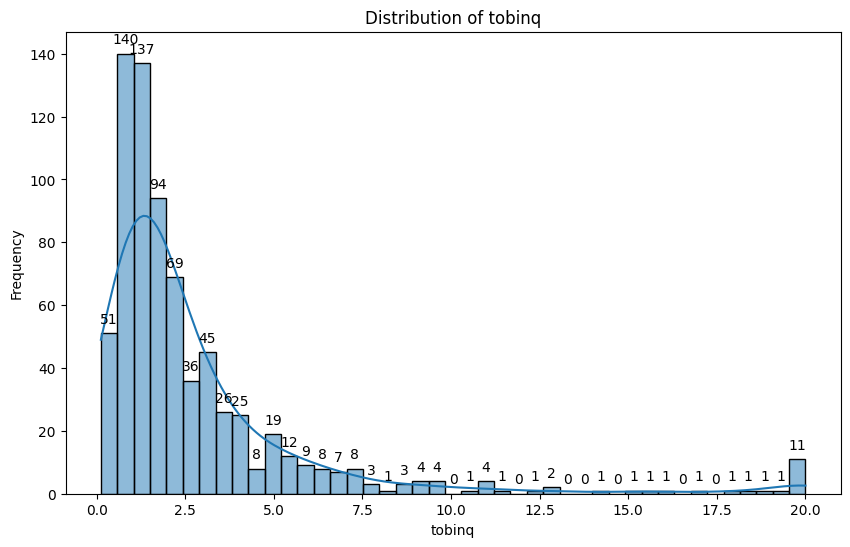

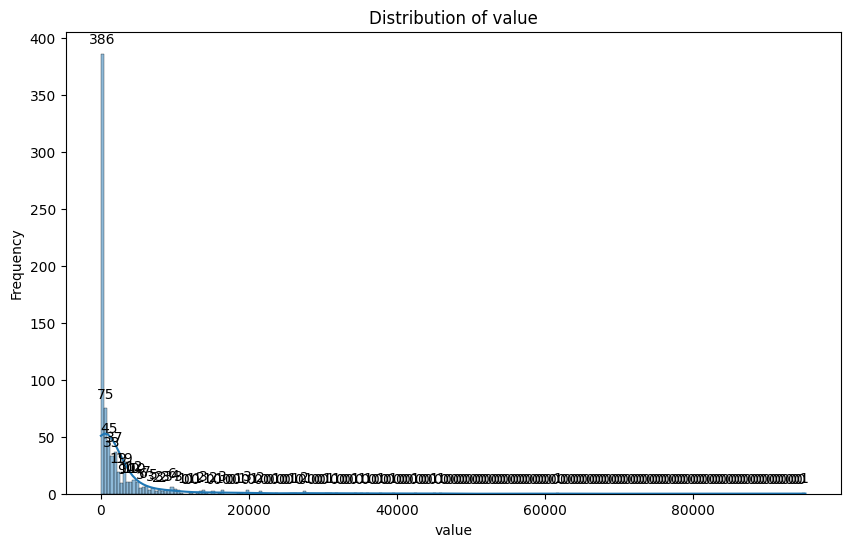

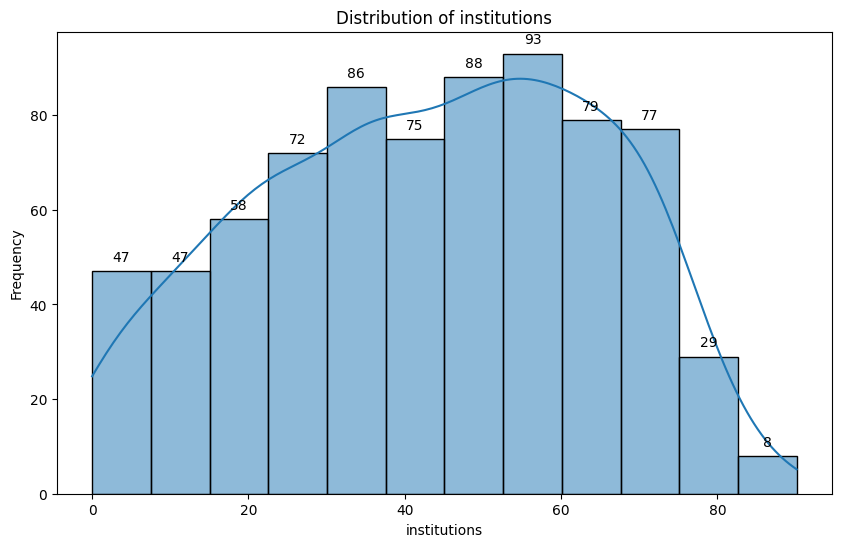

In [6]:
# Loop through numerical columns and plot distributions
numerical_columns = ['capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']

# Loop through numerical columns and plot distributions with annotations
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plot = sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Add value annotations
    for p in plot.patches:
        plt.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

    plt.show()



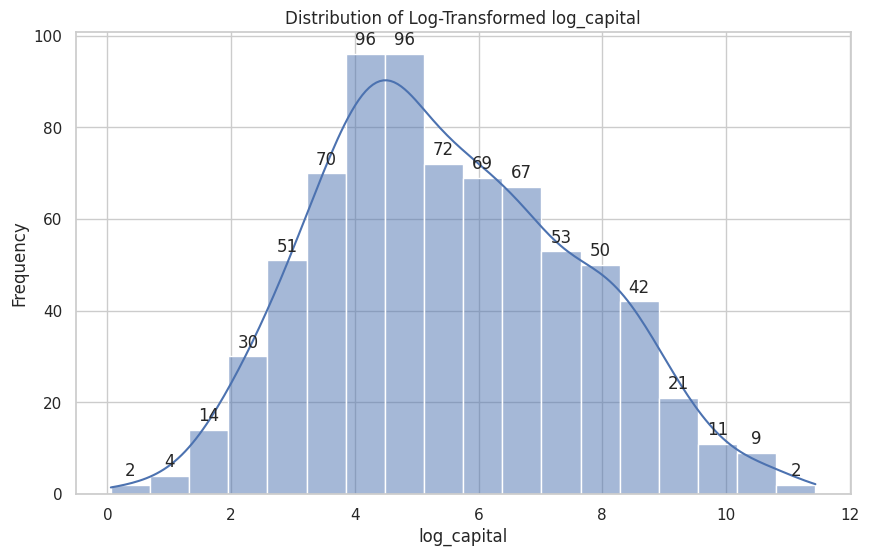

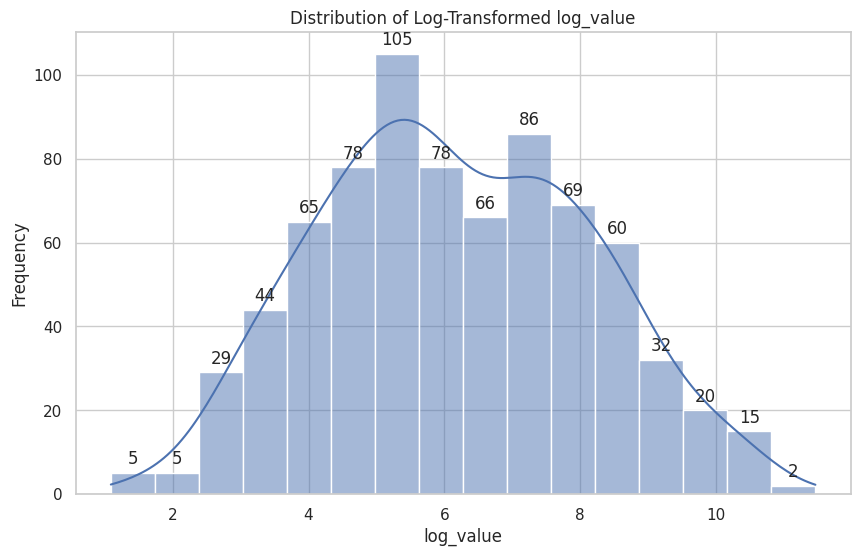

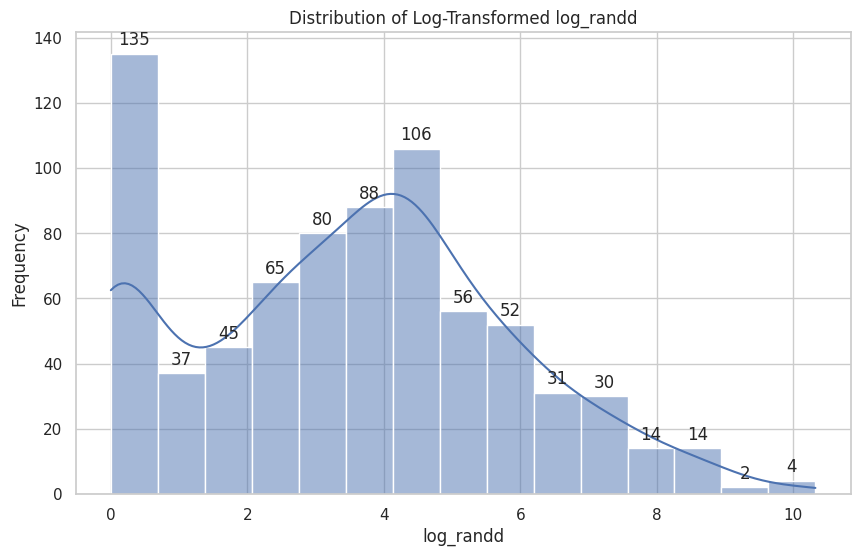

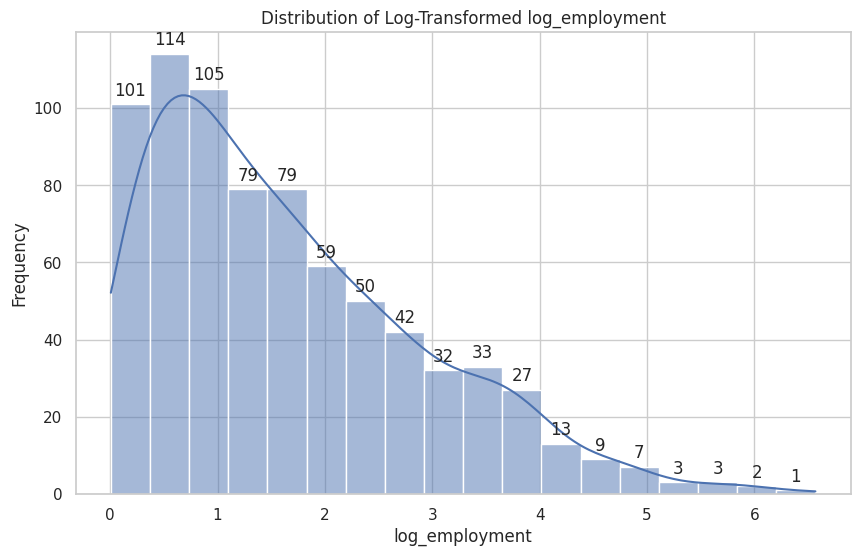

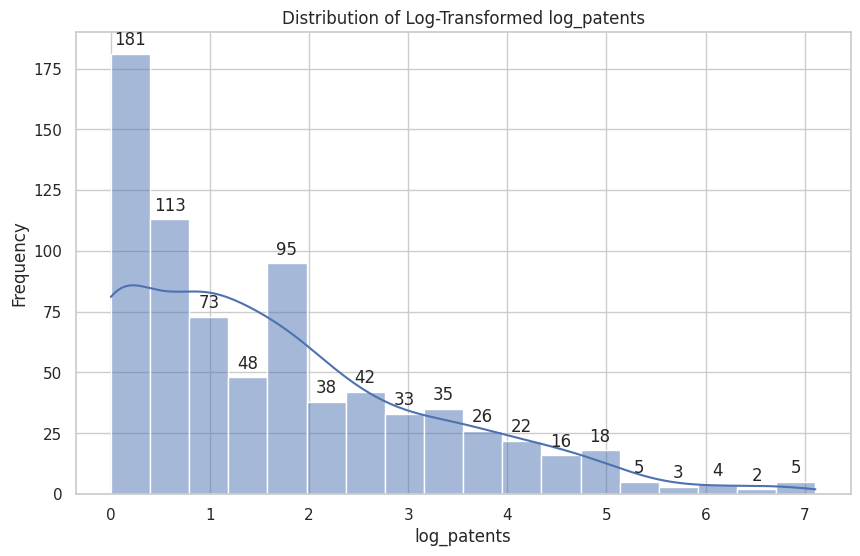

In [7]:
# Set the style for the plots
sns.set(style="whitegrid")

# Apply log transformation to sales and other specified columns
columns_to_transform = ['capital', 'value', 'randd', 'employment', 'patents']
for col in columns_to_transform:
    data[f'log_{col}'] = np.log1p(data[col])

# Function to plot distributions with annotations
def plot_distribution(column, log_transformed=False):
    plt.figure(figsize=(10, 6))
    plot = sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {"Log-Transformed " if log_transformed else ""}{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    for p in plot.patches:
        plt.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')
    plt.show()

# Plot distributions for log-transformed columns
for col in columns_to_transform:
    plot_distribution(f'log_{col}', log_transformed=True)



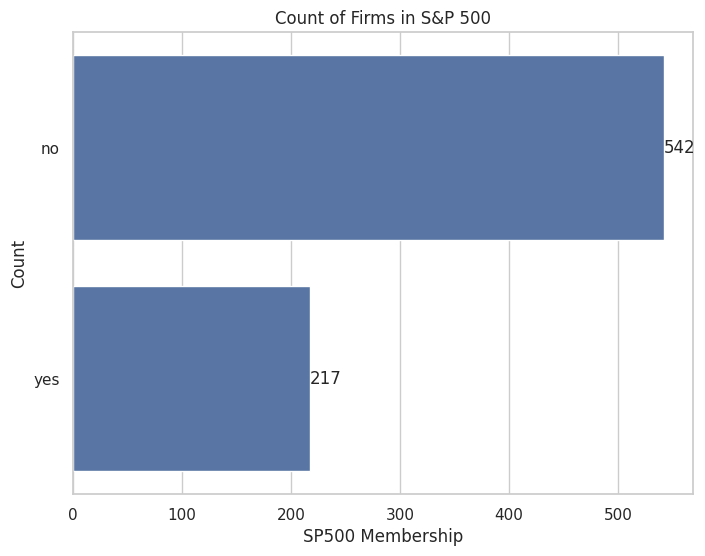

In [8]:
# Count plot for categorical feature (sp500)
plt.figure(figsize=(8, 6))
plot = sns.countplot(data['sp500'])
plt.title('Count of Firms in S&P 500')
plt.xlabel('SP500 Membership')
plt.ylabel('Count')
# Add value annotations
for container in plot.containers:
    plot.bar_label(container, label_type='edge')
plt.show()

In [9]:
# Check data types again
print(data.dtypes)

# Identify columns with non-numeric values
non_numeric_columns = data.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Unnamed: 0          int64
sales             float64
capital           float64
patents             int64
randd             float64
employment        float64
sp500              object
tobinq            float64
value             float64
institutions      float64
log_sales         float64
log_capital       float64
log_value         float64
log_randd         float64
log_employment    float64
log_patents       float64
dtype: object
Index(['sp500'], dtype='object')


In [10]:
# Display unique values in non-numeric columns
for col in non_numeric_columns:
    print(f"Unique values in column '{col}': {data[col].unique()}")


Unique values in column 'sp500': ['no' 'yes']


In [11]:
# Impute NaN values in 'sp500' with the most frequent category (mode)
sp500_mode = data['sp500'].mode()[0]
data['sp500'].fillna(sp500_mode, inplace=True)
# Convert 'sp500' column from 'yes'/'no' to 1/0
data['sp500'] = data['sp500'].apply(lambda x: 1 if x == 'yes' else 0)


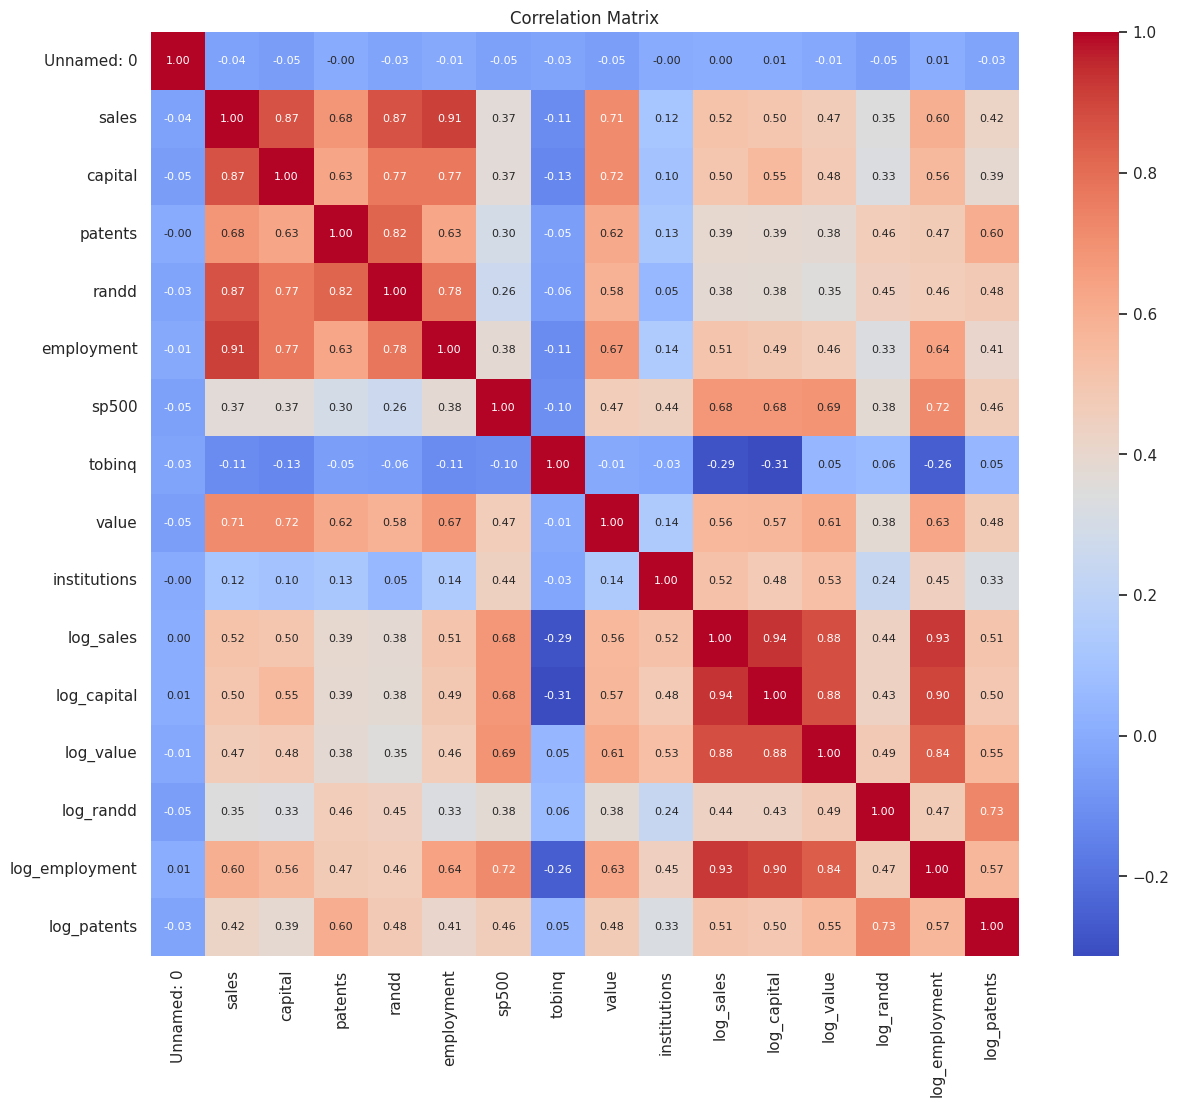

In [12]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap of the correlation matrix with better annotations
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

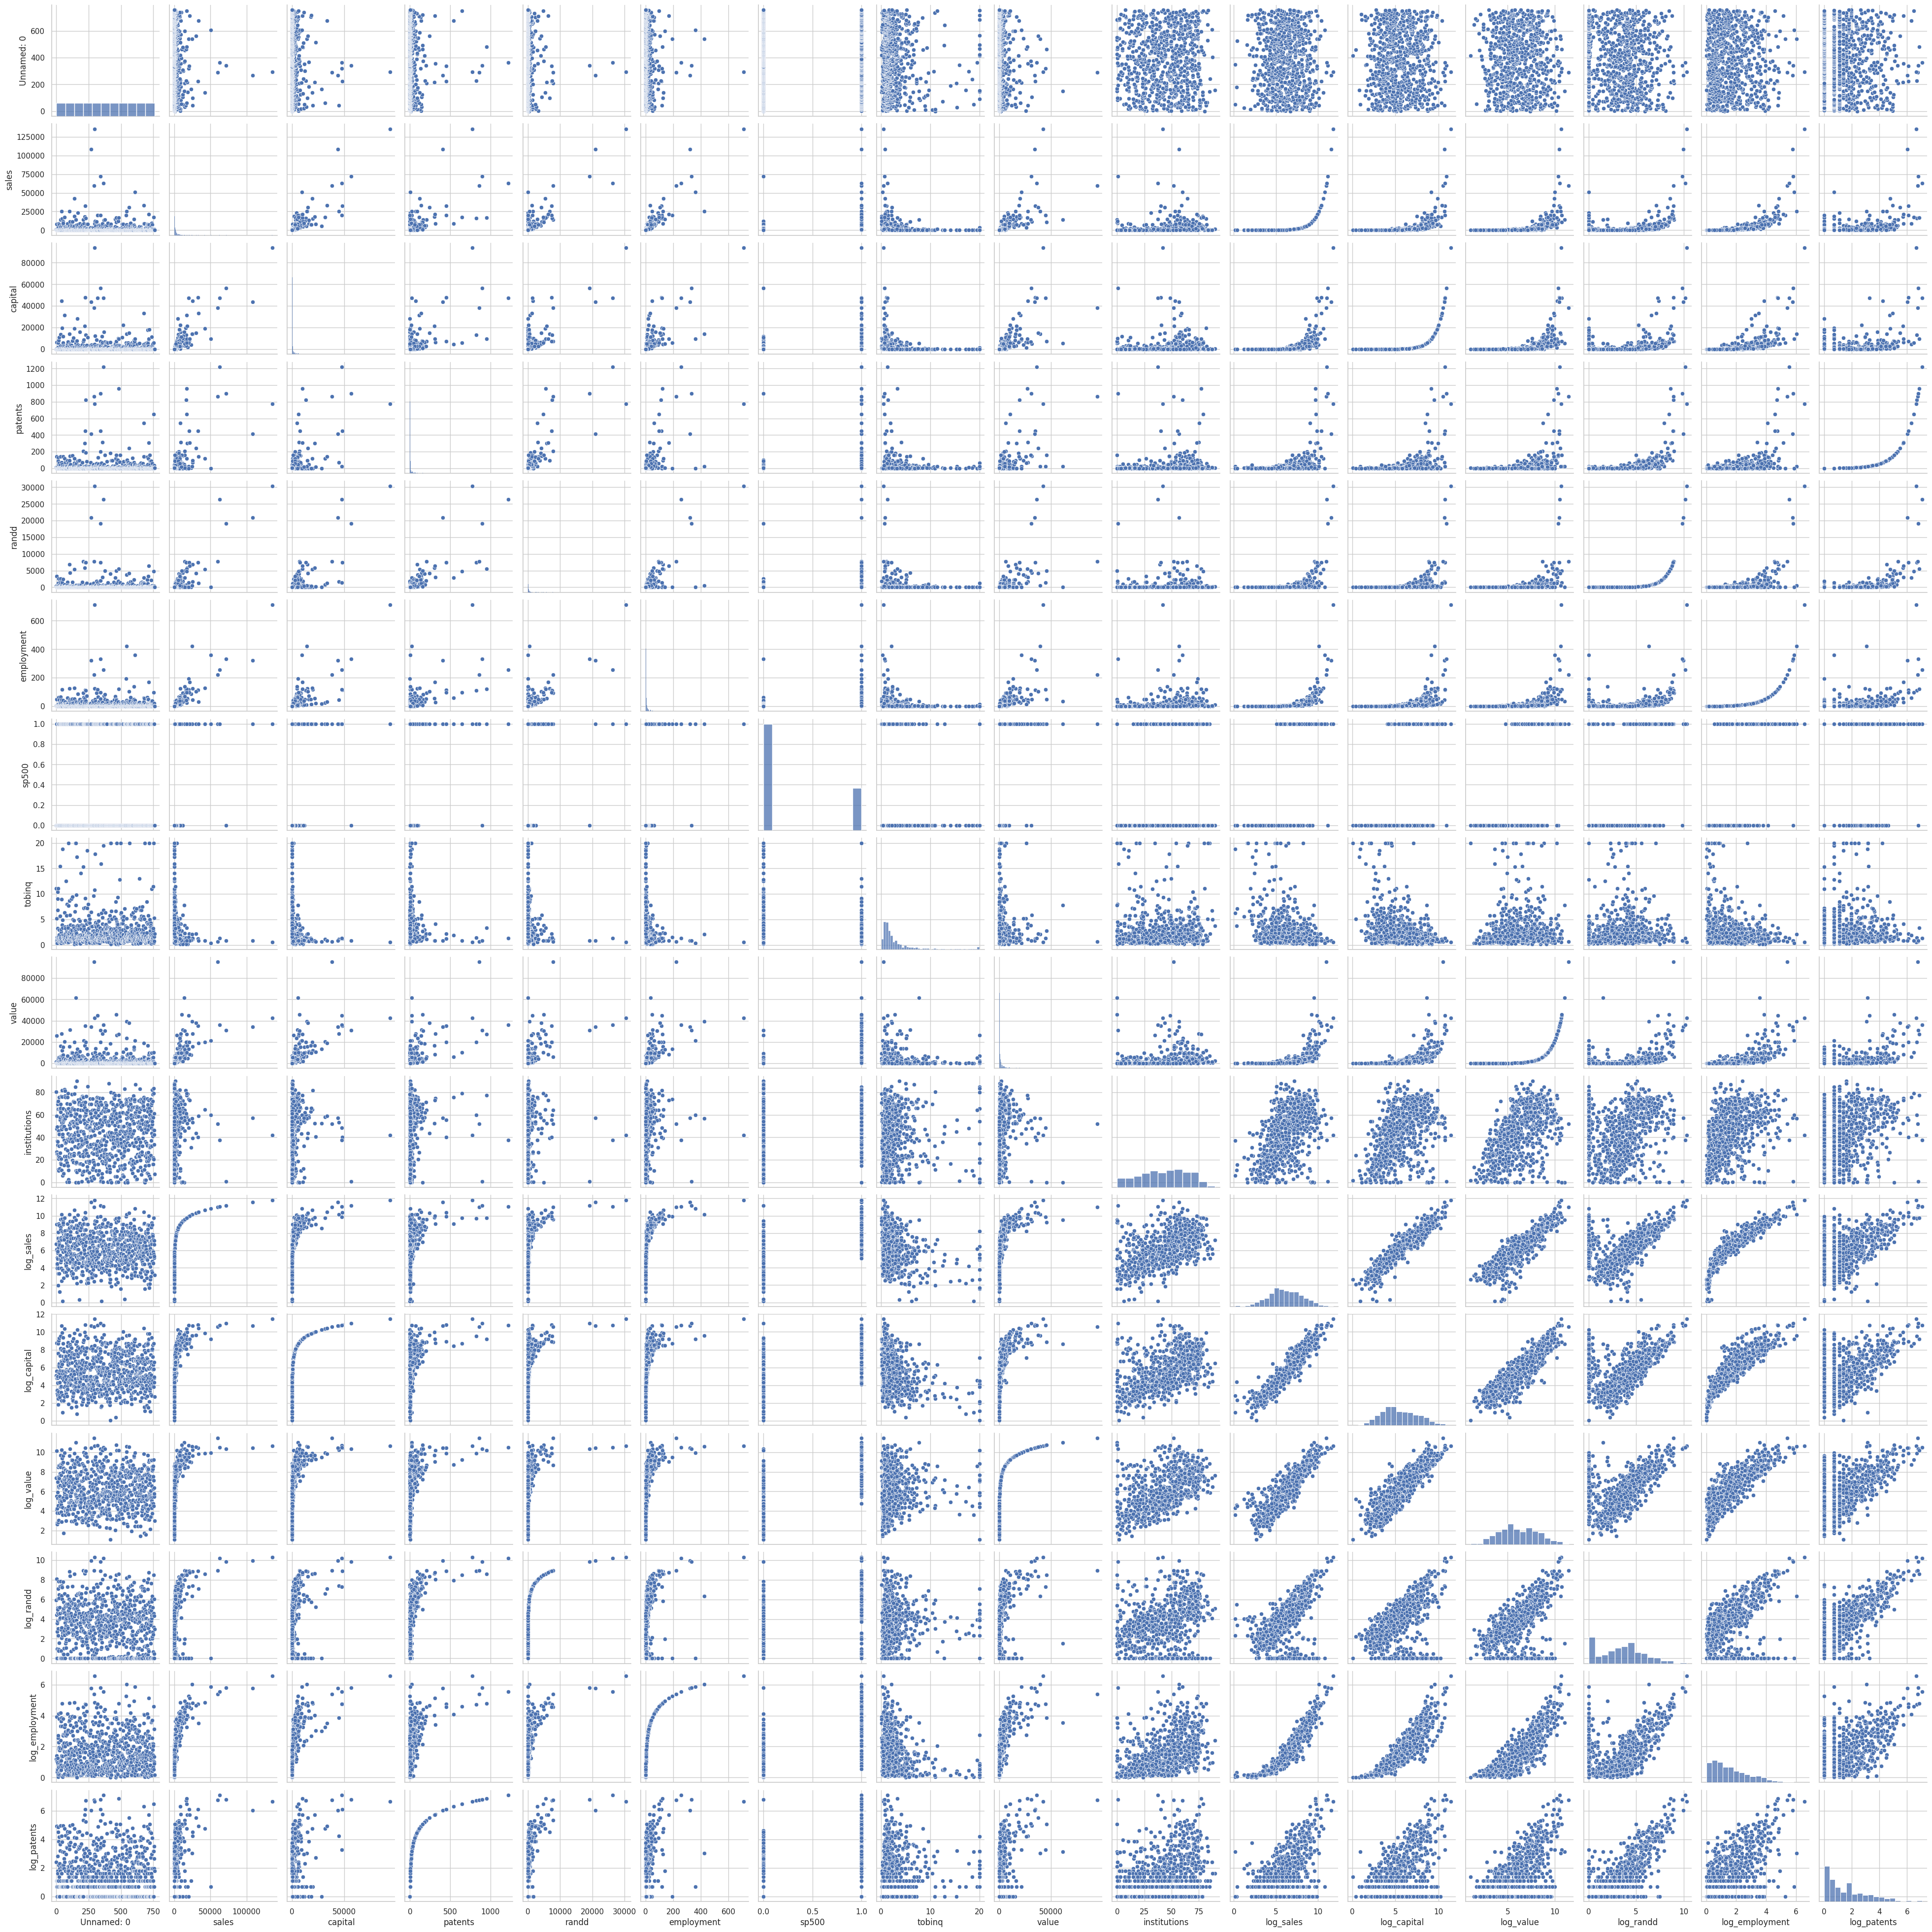

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(data)
plt.show()


In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 Unnamed: 0         0
sales              0
capital            0
patents            0
randd              0
employment         0
sp500              0
tobinq            21
value              0
institutions       0
log_sales          0
log_capital        0
log_value          0
log_randd          0
log_employment     0
log_patents        0
dtype: int64


In [14]:
# Depending on the results, you can fill missing values or drop rows/columns with missing values.
# For this example, we'll fill missing values with the median of each column.
data.fillna(data.median(), inplace=True)


In [15]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 Unnamed: 0        0
sales             0
capital           0
patents           0
randd             0
employment        0
sp500             0
tobinq            0
value             0
institutions      0
log_sales         0
log_capital       0
log_value         0
log_randd         0
log_employment    0
log_patents       0
dtype: int64


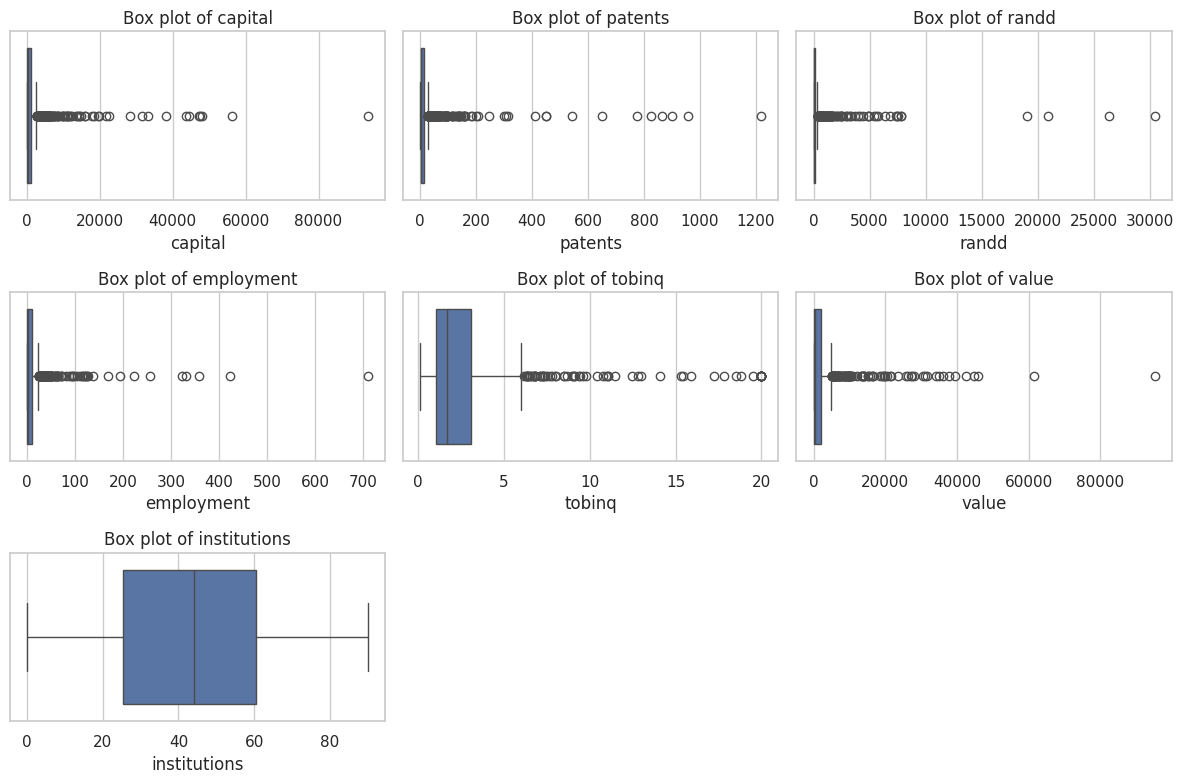

In [ ]:
# Plotting box plots for each numerical variable
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers = {}
for col in columns_to_transform:
    outliers[col] = detect_outliers(col)
    print(f"Outliers in {col}:\n", outliers[col])

# Handling outliers by capping them to the lower and upper bounds
def cap_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

for col in columns_to_transform:
    cap_outliers(col)


Outliers in capital:
      Unnamed: 0         sales       capital  patents        randd  employment  \
2             2   8407.845588   6221.144614      138  3296.700439   49.659005   
15           15   3327.700653   5952.800214       90   433.693146   14.074999   
16           16   8505.575536   8356.835884       47  2553.186035   60.699999   
20           20   7231.997259  11091.997140        1   665.430603   43.900007   
31           31   5851.586151  13787.241420        1     0.000000   10.173000   
..          ...           ...           ...      ...          ...         ...   
738         738   9544.789176  11304.501790       18   318.245270   36.747999   
739         739   7533.000266   2836.000355       59   554.671753   39.589996   
742         742   2622.237544   3323.232135        0     0.013687   12.040001   
743         743   2438.200441   5033.099687        0     0.000000    7.189000   
752         752  17246.005110   6040.998412      650  4851.958984   96.999987   

     

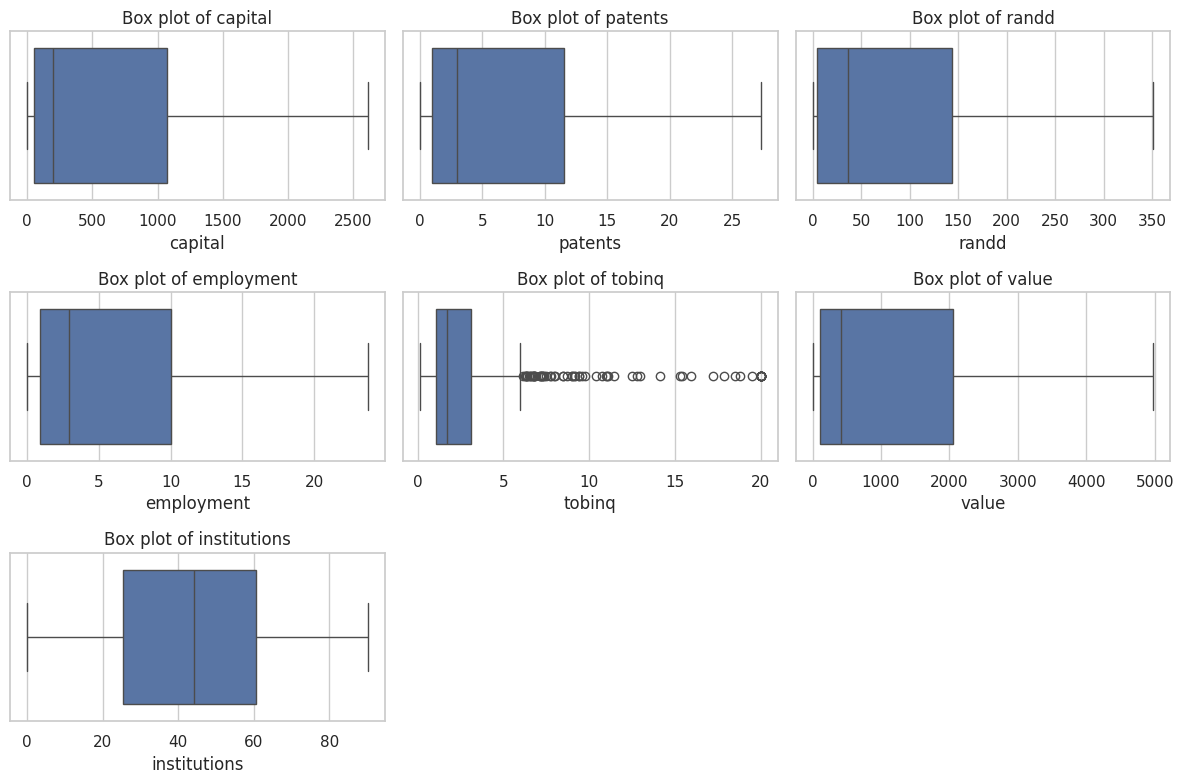

In [ ]:
# Plotting box plots for each numerical variable
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
# Encode 'sp500' column: 'no' -> 0, 'yes' -> 1
data['sp500'] = data['sp500'].map({'no': 0, 'yes': 1})


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['sales', 'Unnamed: 0'])  # Drop the target and any unnecessary columns
y = data['sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (607, 14)
Shape of X_test: (152, 14)
Shape of y_train: (607,)
Shape of y_test: (152,)


In [ ]:
# Check for NaN values
print("NaN values in X_train:\n", X_train.isna().sum())

# Check for infinite values
print("Infinite values in X_train:\n", np.isinf(X_train).sum())

# Check for NaN values in y_train
print("NaN values in y_train:", y_train.isna().sum())

# Check for infinite values in y_train
print("Infinite values in y_train:", np.isinf(y_train).sum())


NaN values in X_train:
 capital           0
patents           0
randd             0
employment        0
sp500             0
tobinq            0
value             0
institutions      0
log_sales         0
log_capital       0
log_value         0
log_randd         0
log_employment    0
log_patents       0
dtype: int64
Infinite values in X_train:
 capital           0
patents           0
randd             0
employment        0
sp500             0
tobinq            0
value             0
institutions      0
log_sales         0
log_capital       0
log_value         0
log_randd         0
log_employment    0
log_patents       0
dtype: int64
NaN values in y_train: 0
Infinite values in y_train: 0


In [ ]:
# Fill NaN values with the median
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())
y_train = y_train.fillna(y_train.median())
y_test = y_test.fillna(y_test.median())



# Handle infinite values by replacing with finite values (e.g., the median of the column)
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_test.median())
y_train = y_train.replace([np.inf, -np.inf], np.nan).fillna(y_train.median())
y_test = y_test.replace([np.inf, -np.inf], np.nan).fillna(y_test.median())

# Verify again that there are no NaN or infinite values
print("NaN values in X_train after handling:\n", X_train.isna().sum())
print("Infinite values in X_train after handling:\n", np.isinf(X_train).sum())
print("NaN values in y_train after handling:", y_train.isna().sum())
print("Infinite values in y_train after handling:", np.isinf(y_train).sum())


NaN values in X_train after handling:
 capital           0
patents           0
randd             0
employment        0
sp500             0
tobinq            0
value             0
institutions      0
log_sales         0
log_capital       0
log_value         0
log_randd         0
log_employment    0
log_patents       0
dtype: int64
Infinite values in X_train after handling:
 capital           0
patents           0
randd             0
employment        0
sp500             0
tobinq            0
value             0
institutions      0
log_sales         0
log_capital       0
log_value         0
log_randd         0
log_employment    0
log_patents       0
dtype: int64
NaN values in y_train after handling: 0
Infinite values in y_train after handling: 0


In [ ]:
import statsmodels.api as sm
# Function to build a linear regression model and print summary
def build_model(X, y):
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    return model

# Build the initial model with all variables
X_train_const = sm.add_constant(X_train)
initial_model = sm.OLS(y_train, X_train_const).fit()
print(initial_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     46.08
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           3.67e-85
Time:                        12:42:04   Log-Likelihood:                -6164.9
No. Observations:                 607   AIC:                         1.236e+04
Df Residuals:                     592   BIC:                         1.243e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3178.4766   1861.039      1.

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

# Drop insignificant variables iteratively
def build_model(X, y):
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    return model

# Copy the original train data
X_train_reduced = X_train.copy()

# Initial model with all variables
initial_model = build_model(X_train_reduced, y_train)
print(initial_model.summary())

# Function to drop the most insignificant variable (highest p-value)
def drop_insignificant_variable(model, X):
    p_values = model.pvalues.iloc[1:]  # exclude the intercept
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        drop_var = p_values.idxmax()
        X = X.drop(columns=[drop_var])
        return X, drop_var, max_p_value
    else:
        return X, None, max_p_value

# Iteratively drop insignificant variables
iteration = 1
while True:
    print(f"\nIteration {iteration}")
    X_train_reduced, dropped_var, max_p_value = drop_insignificant_variable(initial_model, X_train_reduced)
    if dropped_var is None:
        print("No more insignificant variables to drop.")
        break
    print(f"Dropped variable: {dropped_var} with p-value: {max_p_value}")
    new_model = build_model(X_train_reduced, y_train)
    print(new_model.summary())
    initial_model = new_model
    iteration += 1

# Final model after dropping insignificant variables
final_model = new_model

# Model performance on train set
y_train_pred = final_model.predict(sm.add_constant(X_train_reduced))
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Model performance on test set
X_test_reduced = X_test[X_train_reduced.columns]
y_test_pred = final_model.predict(sm.add_constant(X_test_reduced))
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"Train R-squared: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Test R-squared: {test_r2}")
print(f"Test RMSE: {test_rmse}")


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     46.08
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           3.67e-85
Time:                        13:06:29   Log-Likelihood:                -6164.9
No. Observations:                 607   AIC:                         1.236e+04
Df Residuals:                     592   BIC:                         1.243e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3178.4766   1861.039      1.

# **PROBLEM 2**

In [16]:
import pandas as pd

# Load the data
data = pd.read_csv('Car_Crash.csv')

# Drop the first column (assuming it is an identifier or index)
data = data.drop(data.columns[0], axis=1)

# Check data types and unique values
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
None
   dvcat  weight      Survived  airbag seatbelt  frontal sex  ageOFocc  \
0    55+  27.078  Not_Survived    no

In [17]:
# Fill missing values in 'injSeverity' with the median value
data['injSeverity'].fillna(data['injSeverity'].median(), inplace=True)

# Verify that there are no missing values
print(data['injSeverity'].isnull().sum())

0


In [18]:
# Check the shape of the dataset
print(f'Shape of the dataset: {data.shape}')

# Check data types of each column
print(data.dtypes)

# Assign the distribution of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

Shape of the dataset: (11217, 15)
dvcat           object
weight         float64
Survived        object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh        float64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
caseid          object
dtype: object


In [22]:
# Statistical summary for numerical columns
numerical_summary = data.describe()
print(numerical_summary)
print(data.describe(include='object'))


             weight       frontal      ageOFocc       yearacc       yearVeh  \
count  11217.000000  11217.000000  11217.000000  11217.000000  11217.000000   
mean     431.405309      0.644022     37.427654   2001.103236   1994.177944   
std     1406.202941      0.478830     18.192429      1.056805      5.658704   
min        0.000000      0.000000     16.000000   1997.000000   1953.000000   
25%       28.292000      0.000000     22.000000   2001.000000   1991.000000   
50%       82.195000      1.000000     33.000000   2001.000000   1995.000000   
75%      324.056000      1.000000     48.000000   2002.000000   1999.000000   
max    31694.040000      1.000000     97.000000   2002.000000   2003.000000   

             deploy   injSeverity  
count  11217.000000  11217.000000  
mean       0.389141      1.826781  
std        0.487577      1.373871  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      2.000000  
75%        1.000000      3.000000  


In [20]:
# Statistical summary for categorical columns
categorical_columns = ['dvcat', 'airbag', 'seatbelt', 'frontal', 'sex', 'abcat', 'occRole']

categorical_summary = {}
for col in categorical_columns:
    categorical_summary[col] = data[col].value_counts()

for col, summary in categorical_summary.items():
    print(f"Summary for {col}:\n{summary}\n")


Summary for dvcat:
dvcat
10-24      5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: count, dtype: int64

Summary for airbag:
airbag
airbag    7064
none      4153
Name: count, dtype: int64

Summary for seatbelt:
seatbelt
belted    7849
none      3368
Name: count, dtype: int64

Summary for frontal:
frontal
1    7224
0    3993
Name: count, dtype: int64

Summary for sex:
sex
m    6048
f    5169
Name: count, dtype: int64

Summary for abcat:
abcat
deploy      4365
unavail     4153
nodeploy    2699
Name: count, dtype: int64

Summary for occRole:
occRole
driver    8786
pass      2431
Name: count, dtype: int64



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical variables
categorical_features = ['dvcat', 'airbag', 'seatbelt', 'sex', 'abcat', 'occRole']

# One-hot encode the categorical variables
encoder = OneHotEncoder(drop=None, sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical columns and concatenate the encoded columns
data = data.drop(categorical_features, axis=1)
data = pd.concat([data, encoded_data], axis=1)

# Check the data after encoding
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   weight           11217 non-null  float64
 1   Survived         11217 non-null  object 
 2   frontal          11217 non-null  int64  
 3   ageOFocc         11217 non-null  int64  
 4   yearacc          11217 non-null  int64  
 5   yearVeh          11217 non-null  float64
 6   deploy           11217 non-null  int64  
 7   injSeverity      11217 non-null  float64
 8   caseid           11217 non-null  object 
 9   dvcat_1-9km/h    11217 non-null  float64
 10  dvcat_10-24      11217 non-null  float64
 11  dvcat_25-39      11217 non-null  float64
 12  dvcat_40-54      11217 non-null  float64
 13  dvcat_55+        11217 non-null  float64
 14  airbag_airbag    11217 non-null  float64
 15  airbag_none      11217 non-null  float64
 16  seatbelt_belted  11217 non-null  float64
 17  seatbelt_non

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


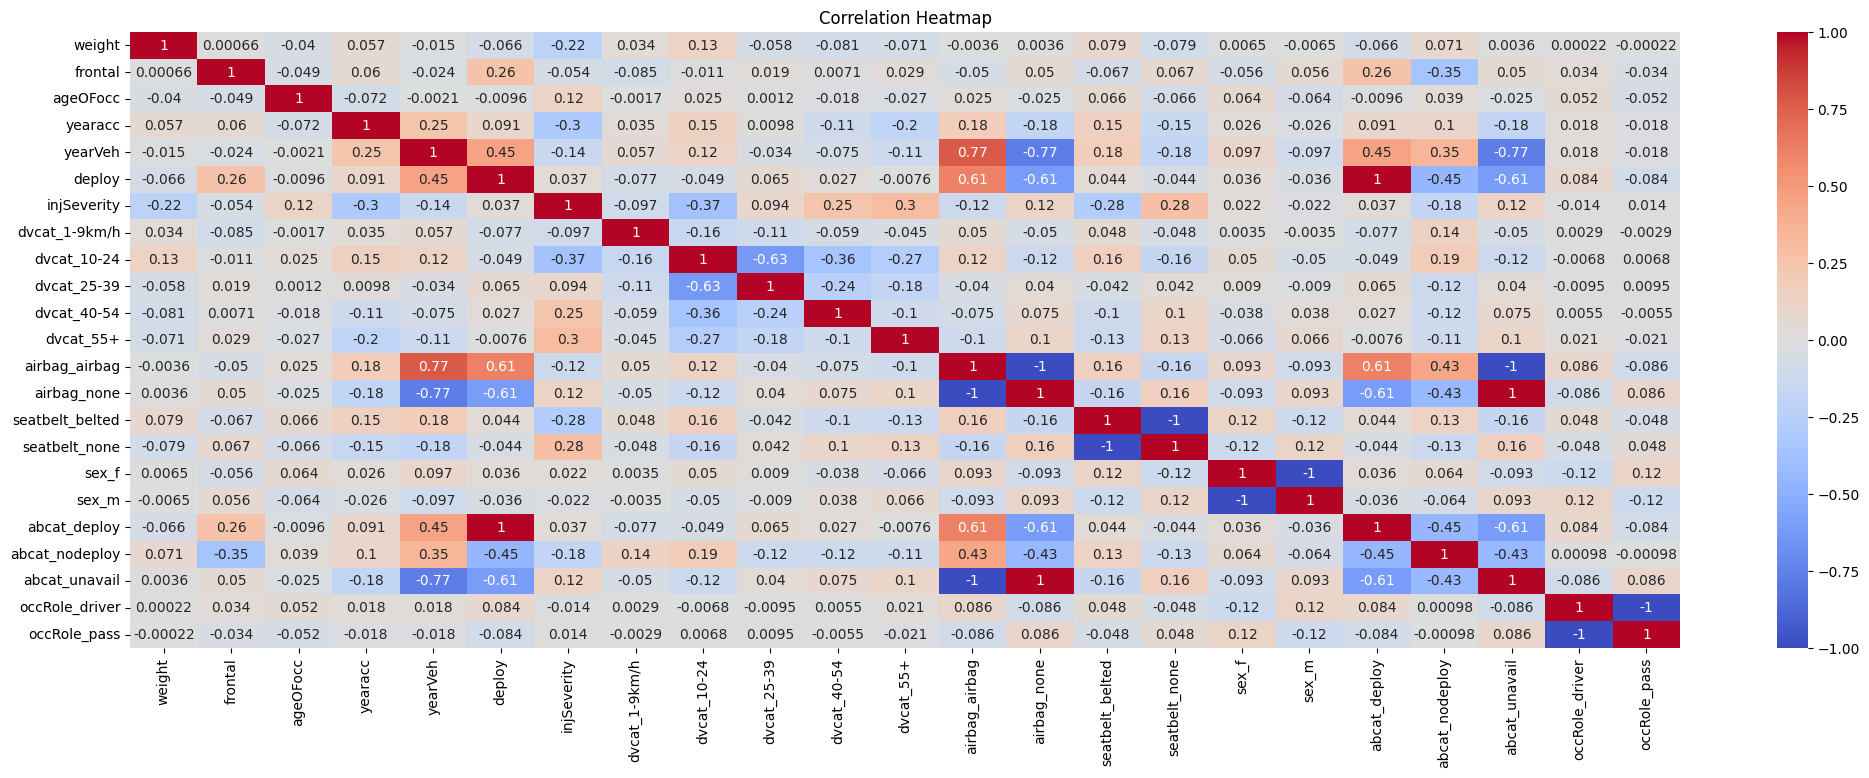

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the target variable
data['Survived'] = data['Survived'].map({'Not_Survived': 0, 'survived': 1})
data.drop('caseid', axis=1, inplace=True)
# Now check the correlation matrix again
y = data['Survived']
X = data.drop('Survived', axis=1, inplace=True)
plt.figure(figsize=(25, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


--------Numerical Columns--------


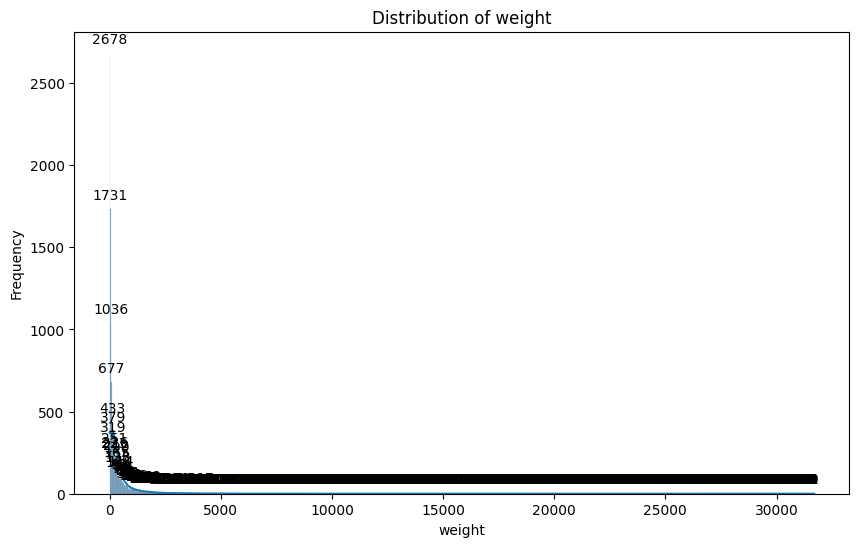

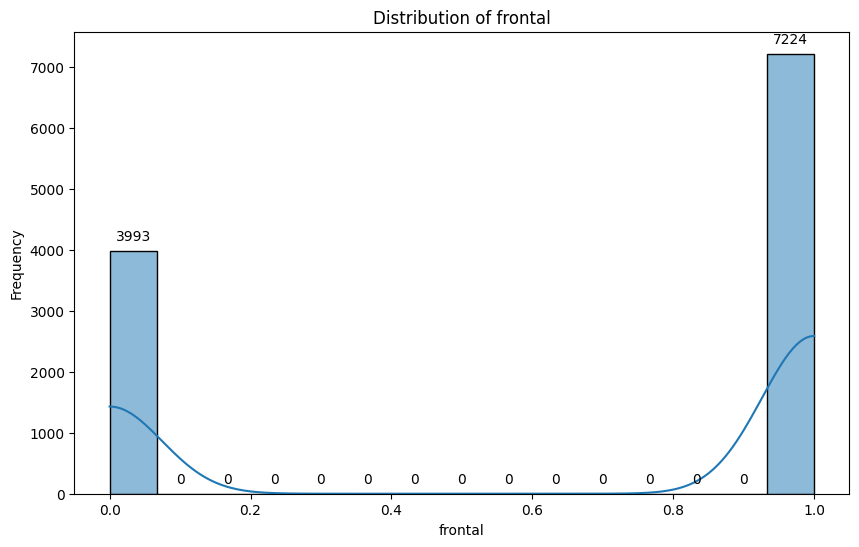

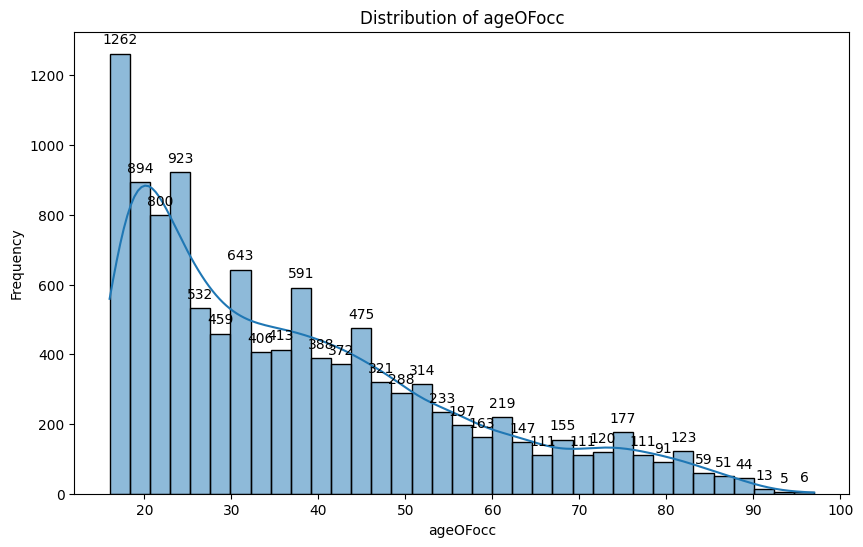

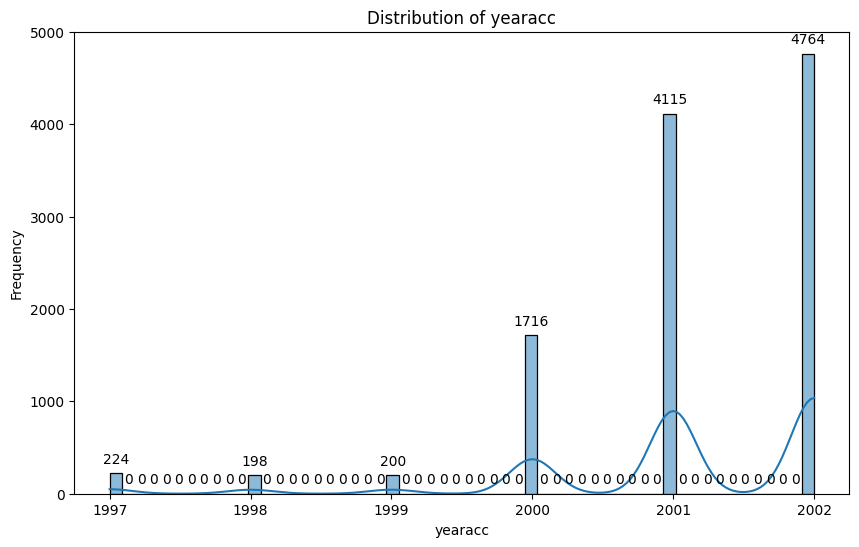

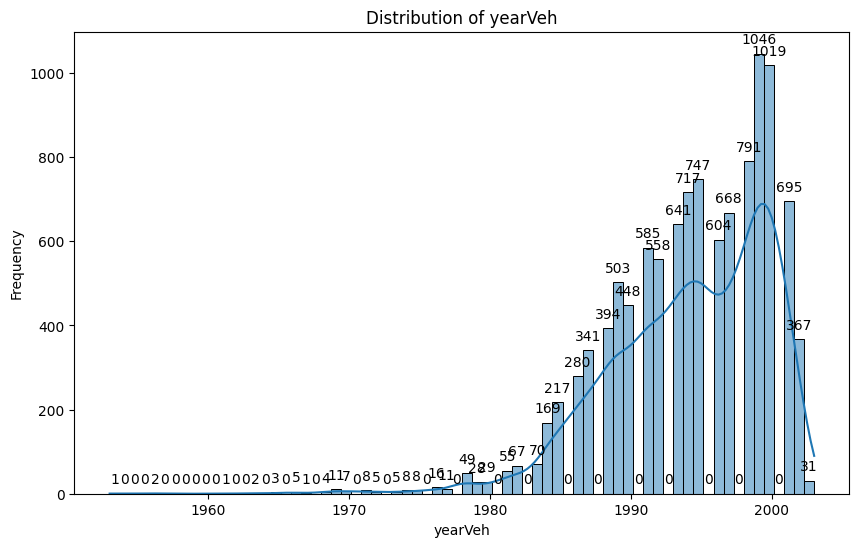

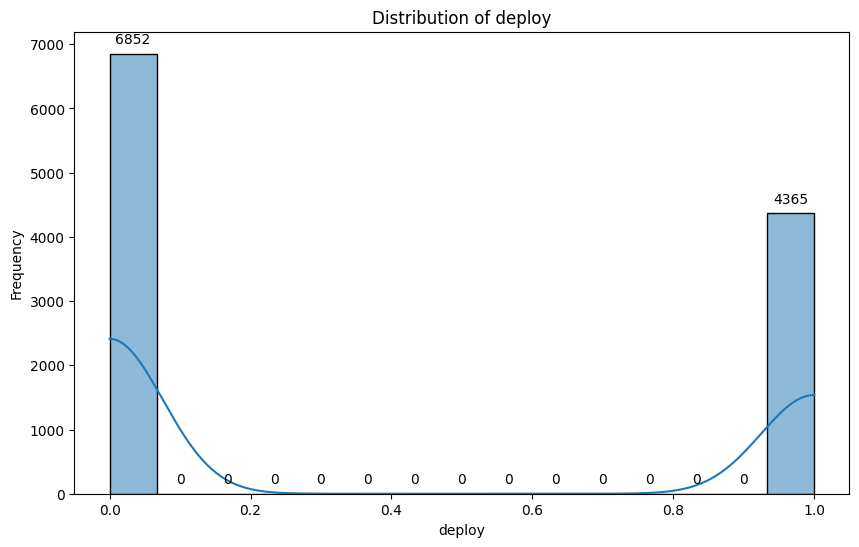

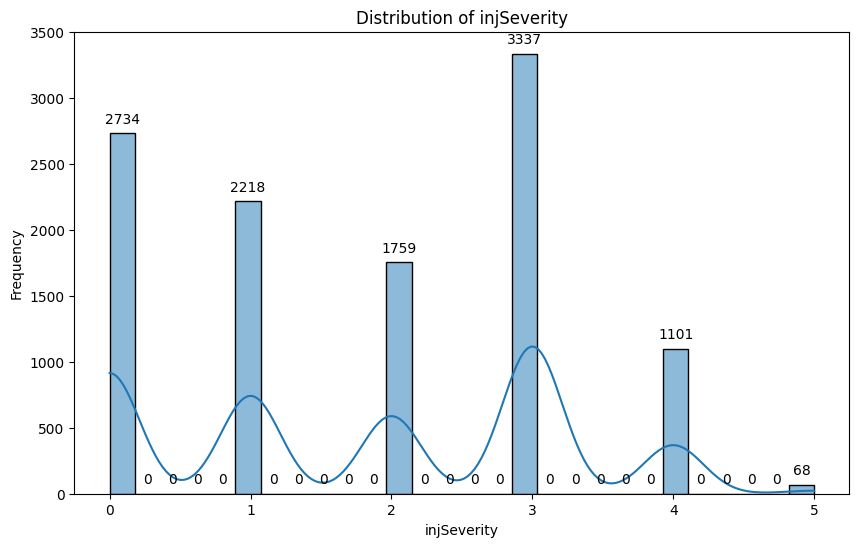

--------Categorical Columns--------


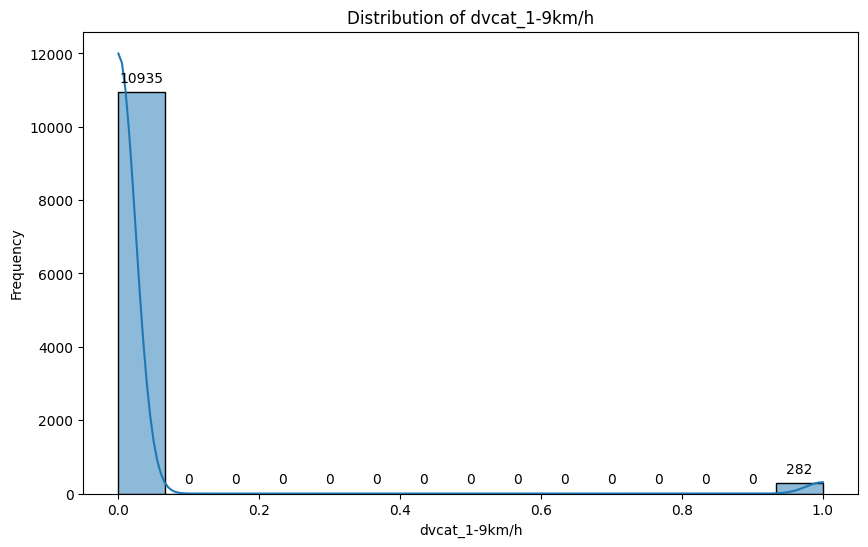

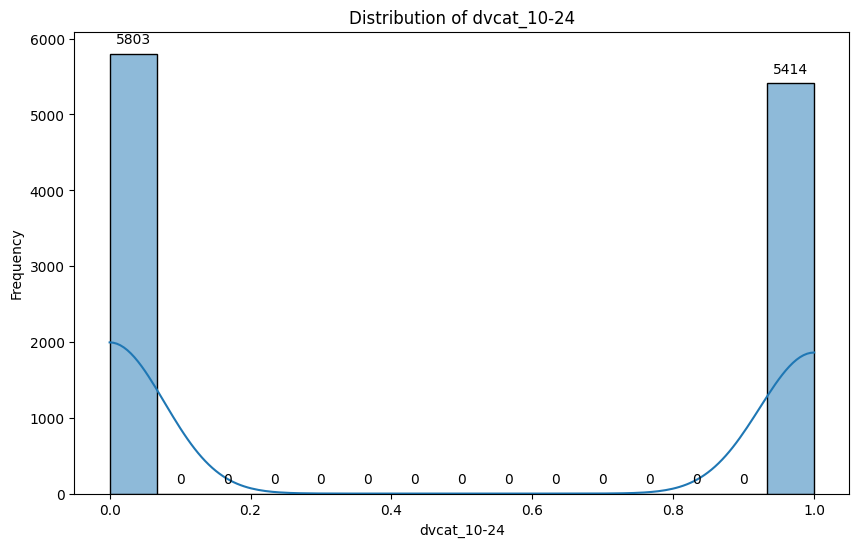

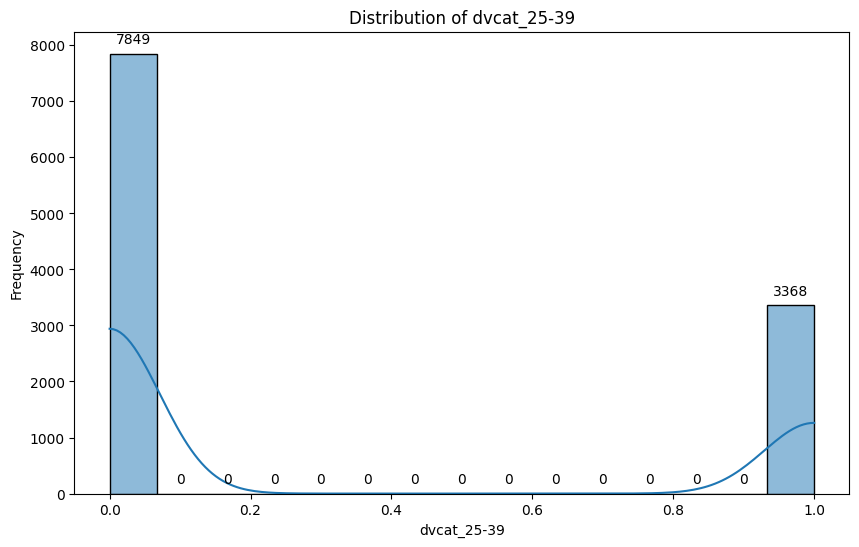

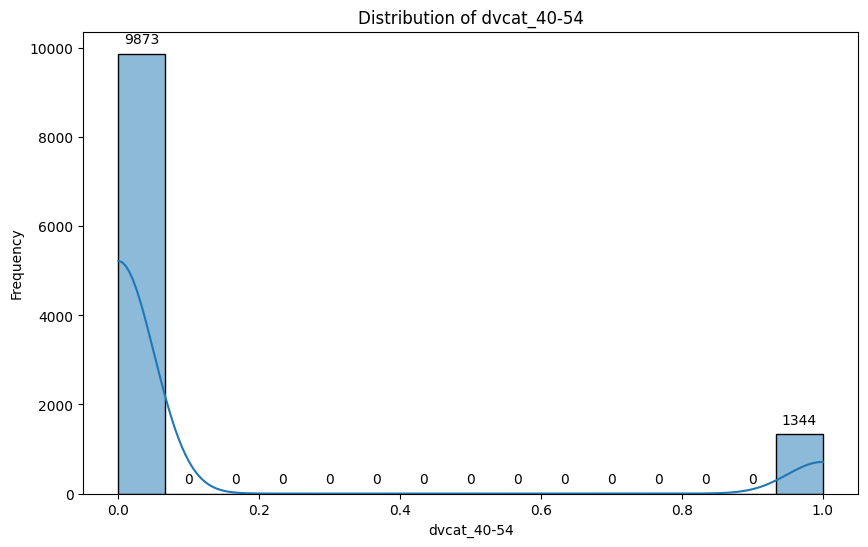

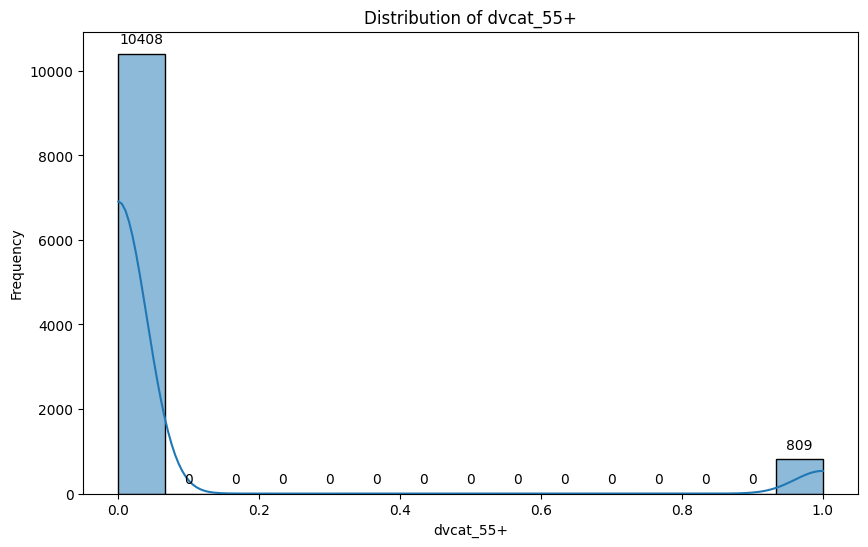

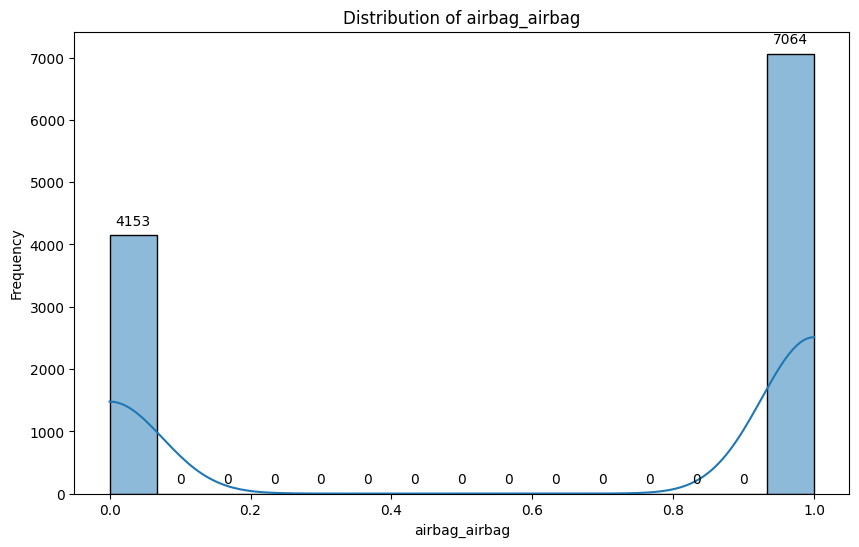

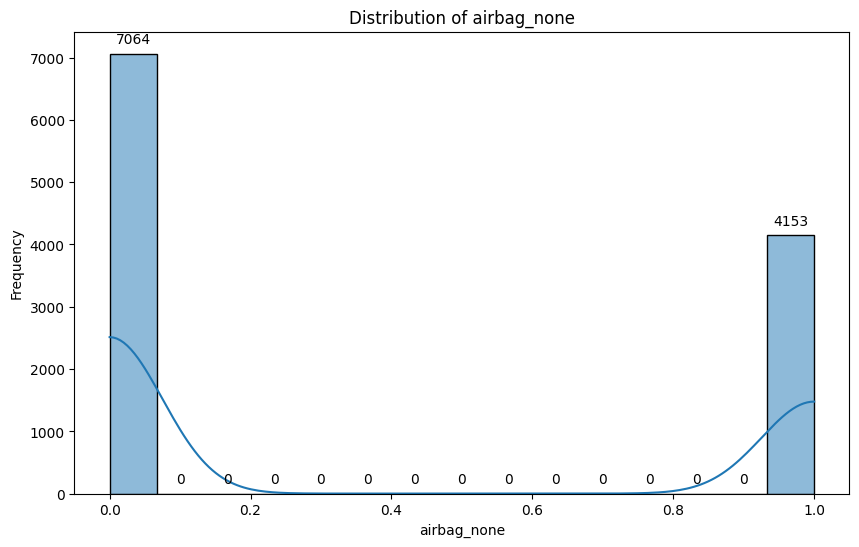

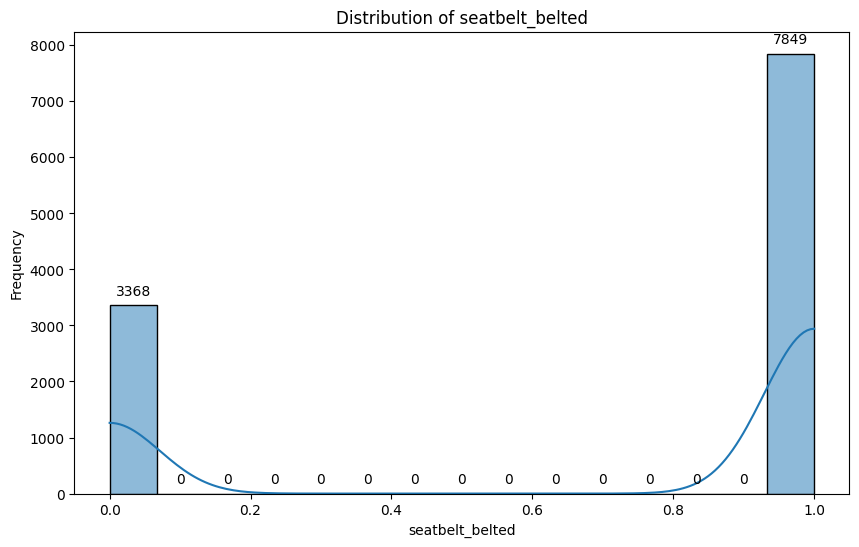

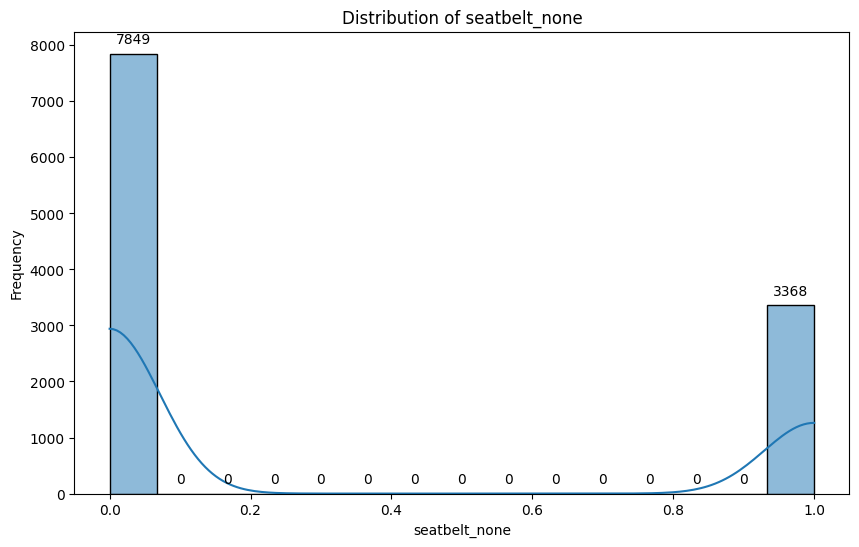

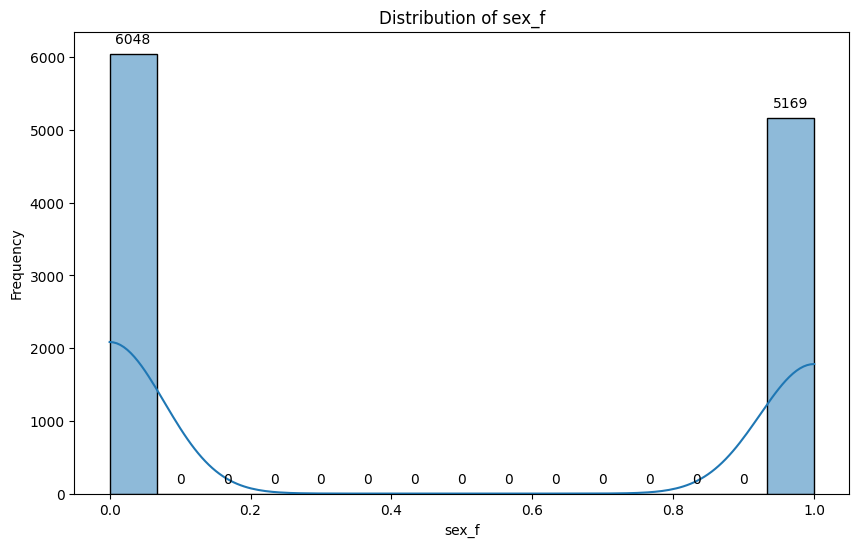

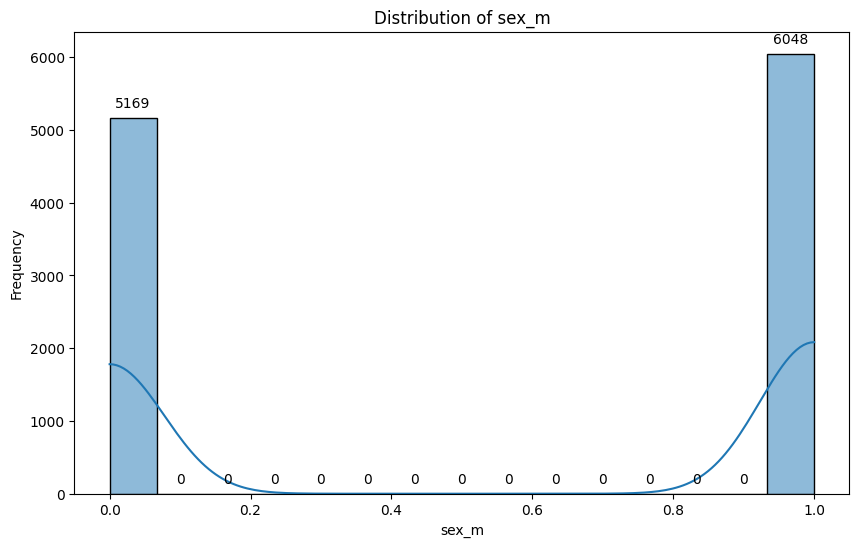

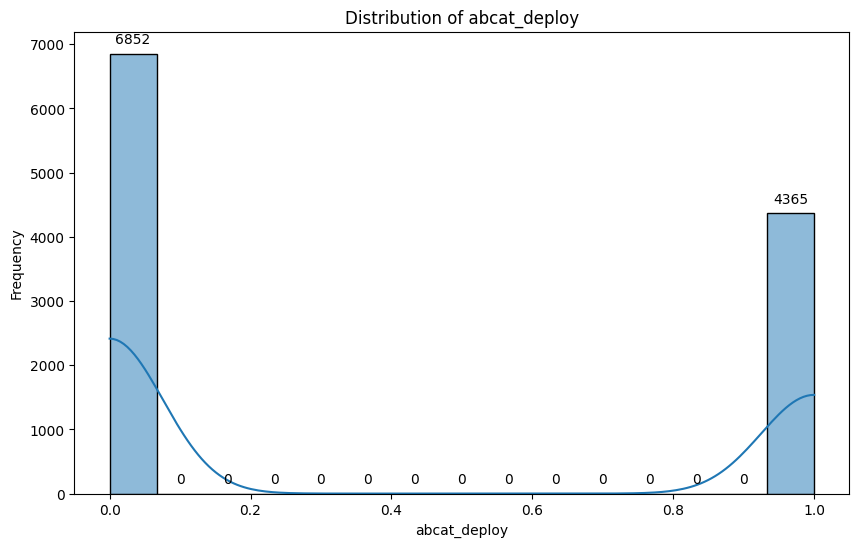

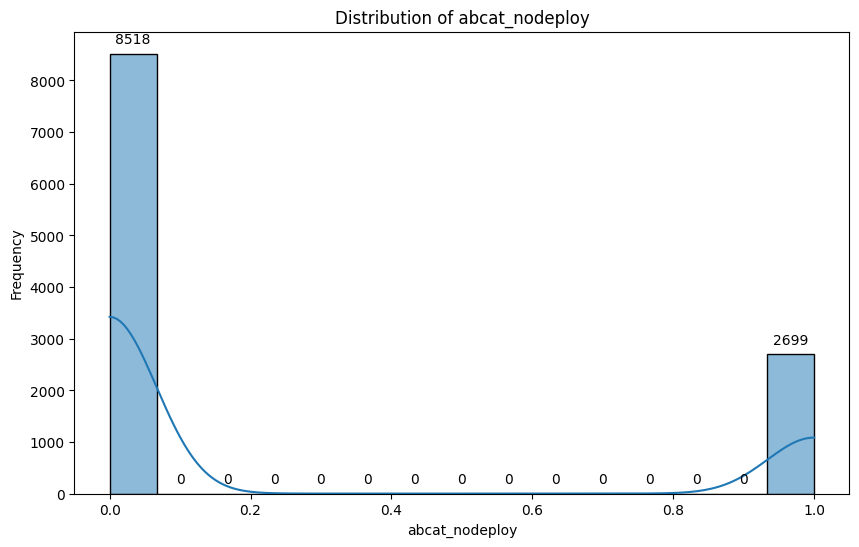

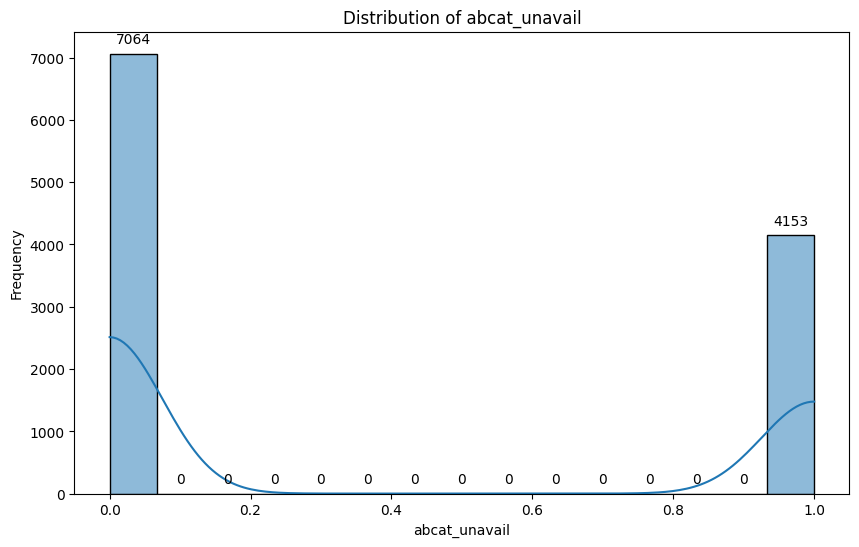

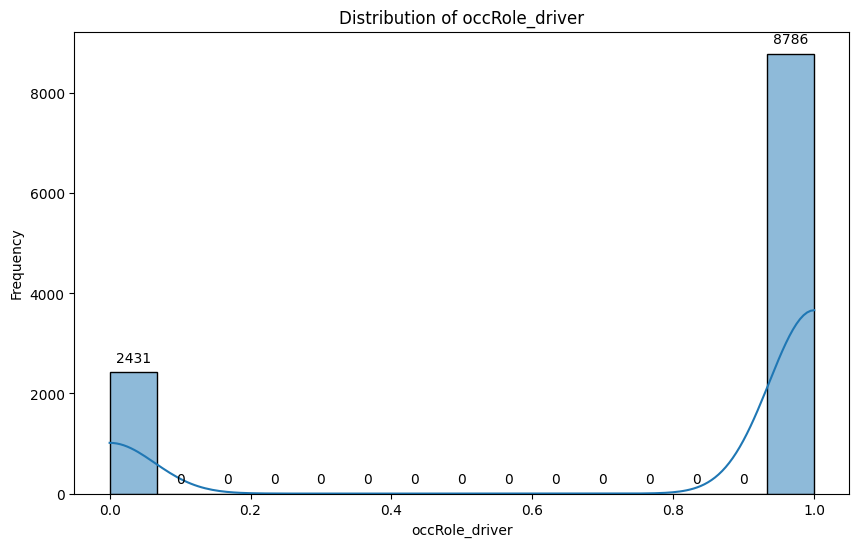

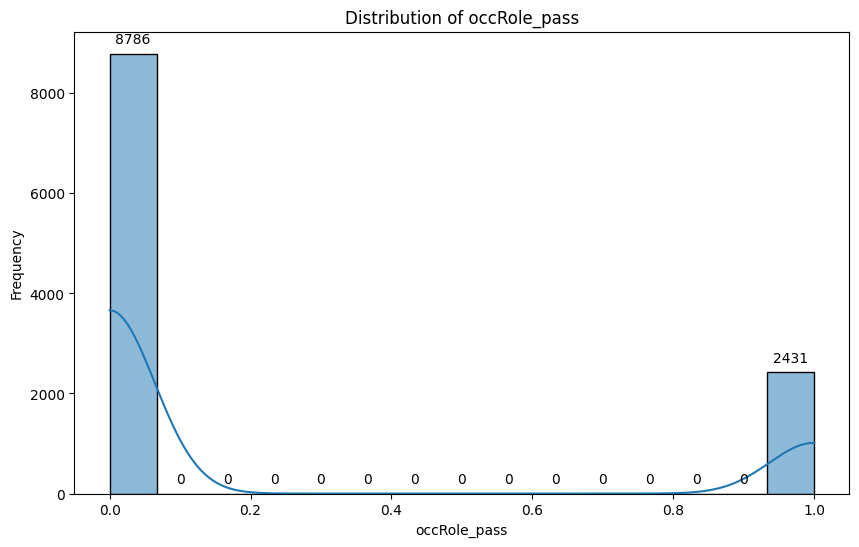

In [ ]:
# Function to plot distributions with annotations
def plot_distribution(column):
    plt.figure(figsize=(10, 6))
    plot = sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    for p in plot.patches:
        plt.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')
    plt.show()

print("--------Numerical Columns--------")
for col in numerical_features:
    plot_distribution(col)

# Visualize the distribution of categorical features (encoded)
encoded_features = encoded_data.columns

print("--------Categorical Columns--------")
for col in encoded_features:
    plot_distribution(col)


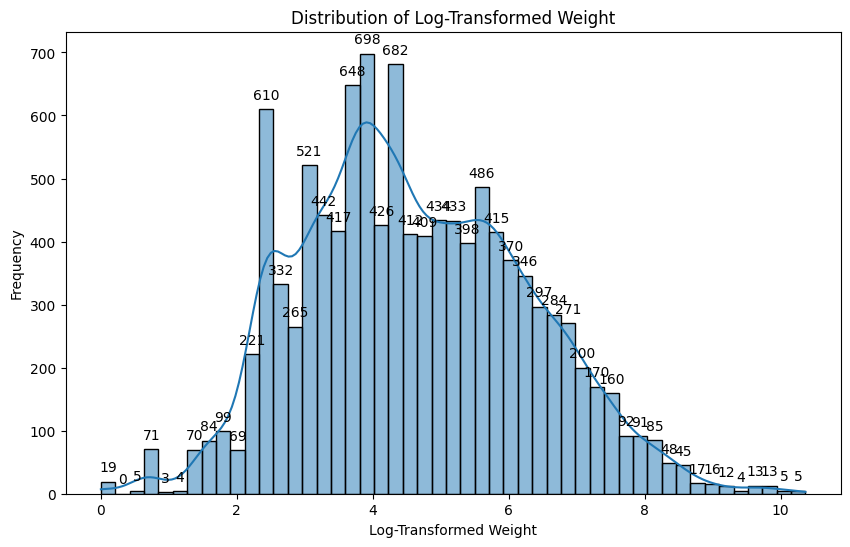

In [ ]:
import numpy as np
# Apply log transformation to weight
log_weight = np.log1p(data['weight'])

# Distribution plot for log-transformed weight with annotations
plt.figure(figsize=(10, 6))
plot = sns.histplot(log_weight, kde=True)
plt.title('Distribution of Log-Transformed Weight')
plt.xlabel('Log-Transformed Weight')
plt.ylabel('Frequency')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points')
plt.show()

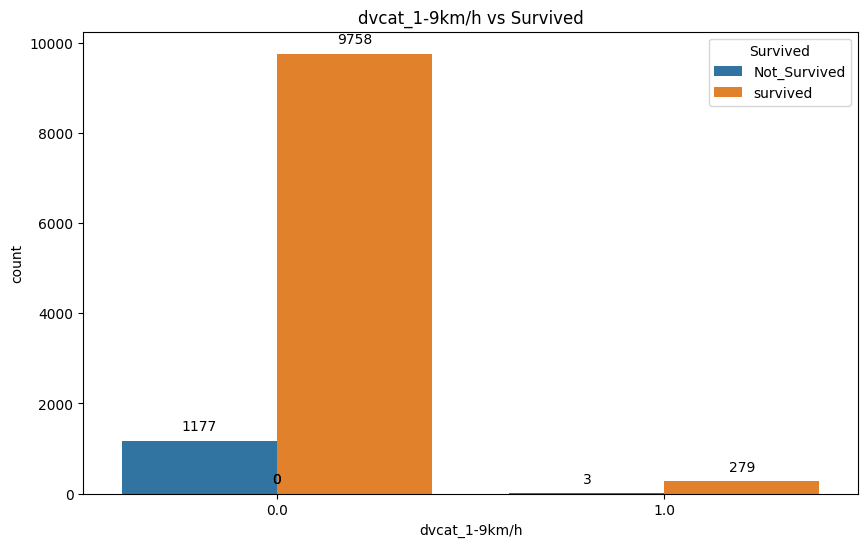

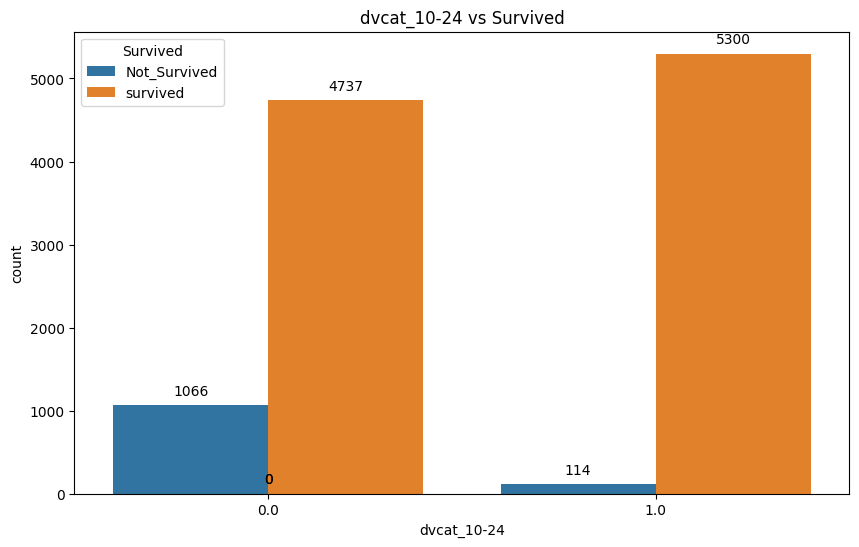

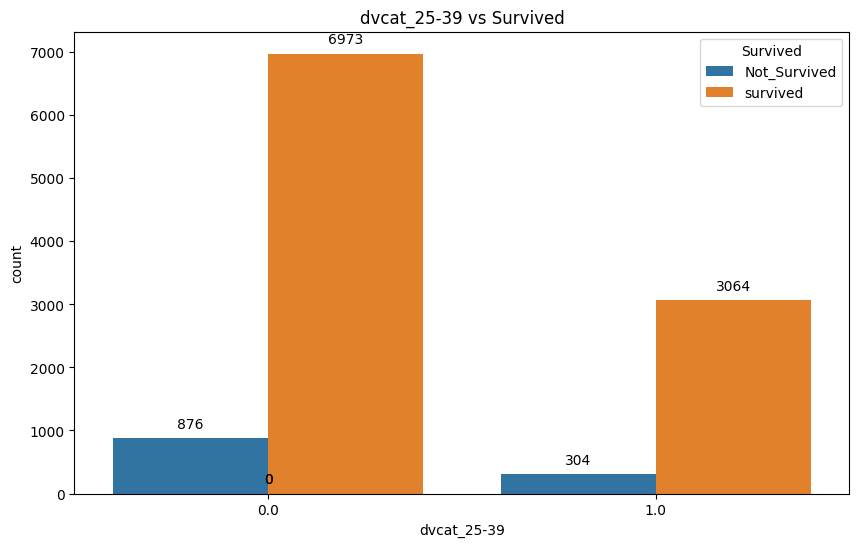

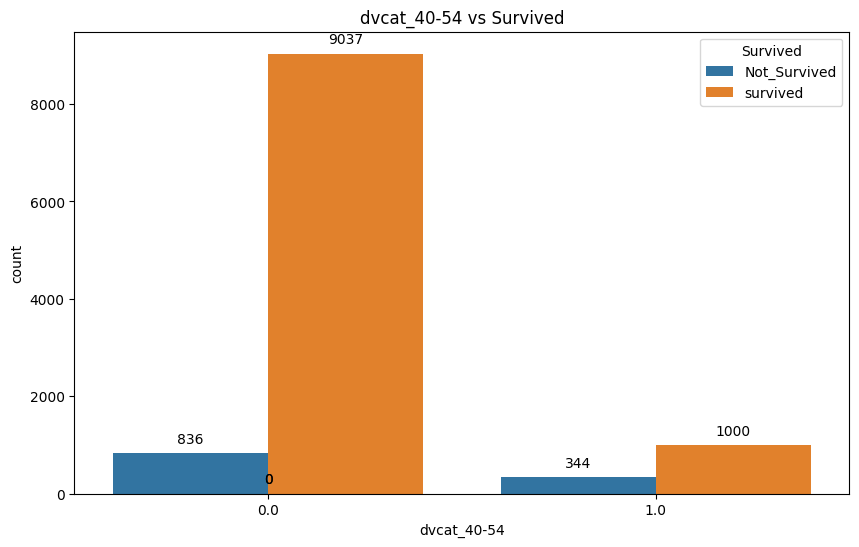

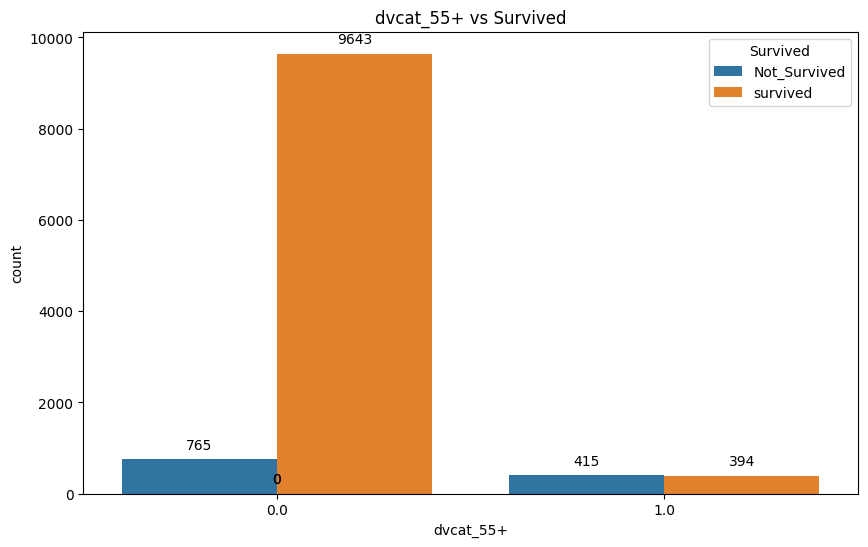

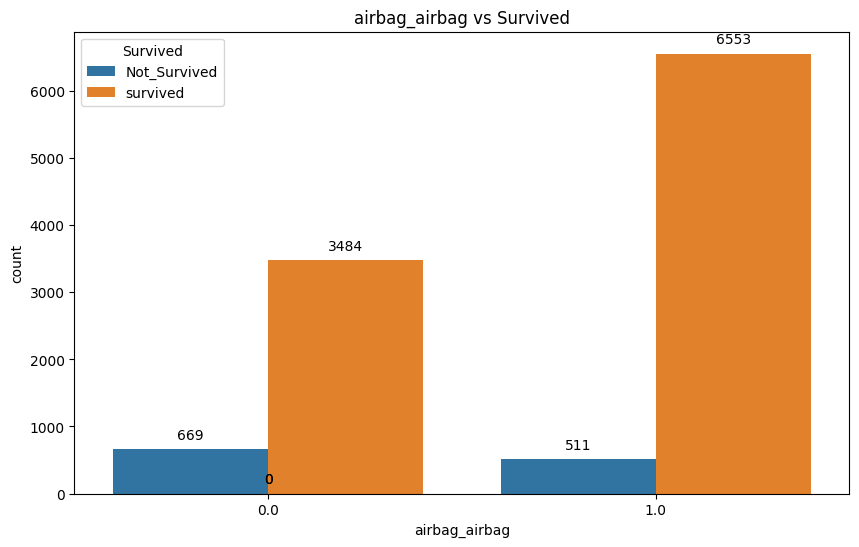

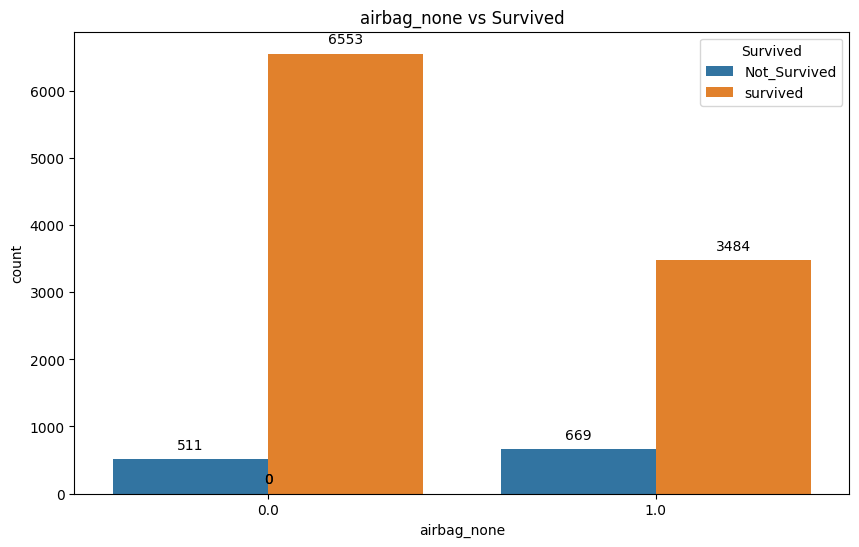

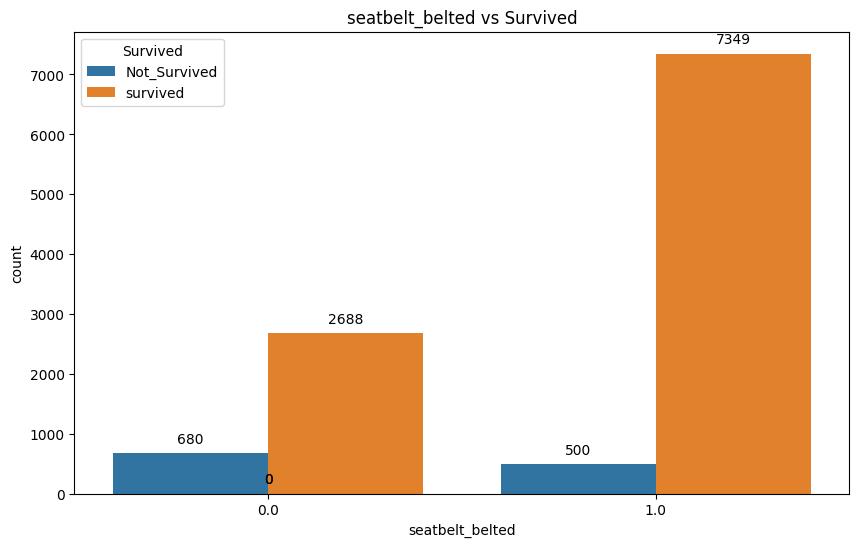

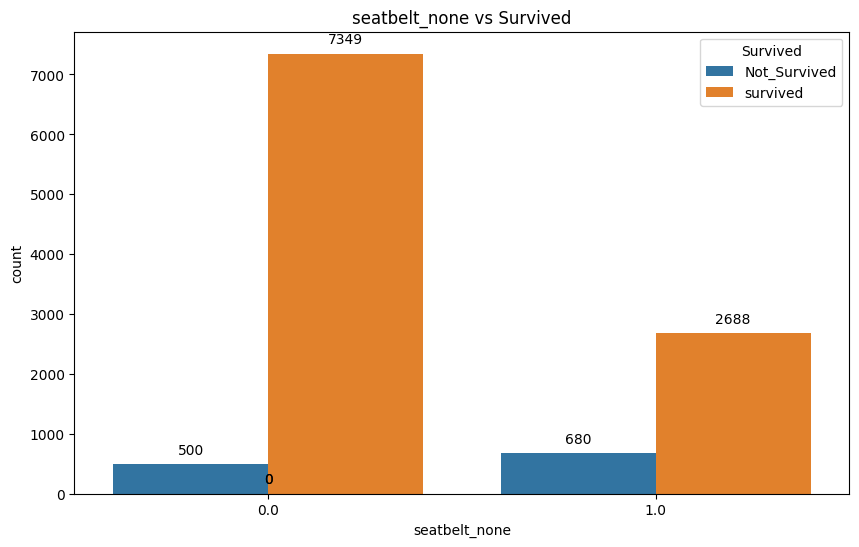

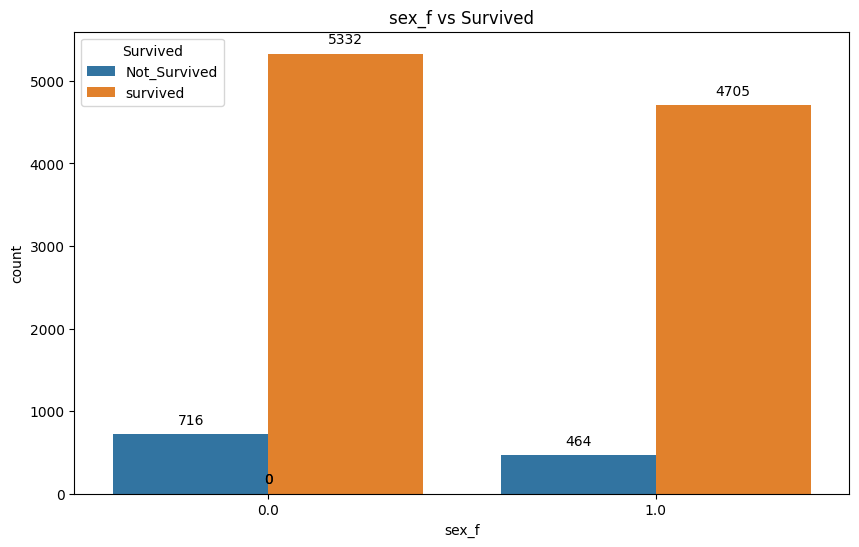

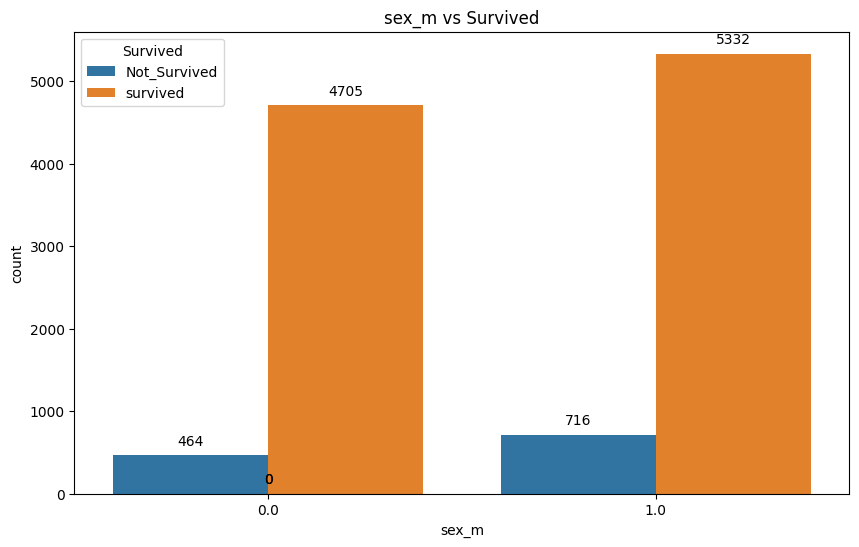

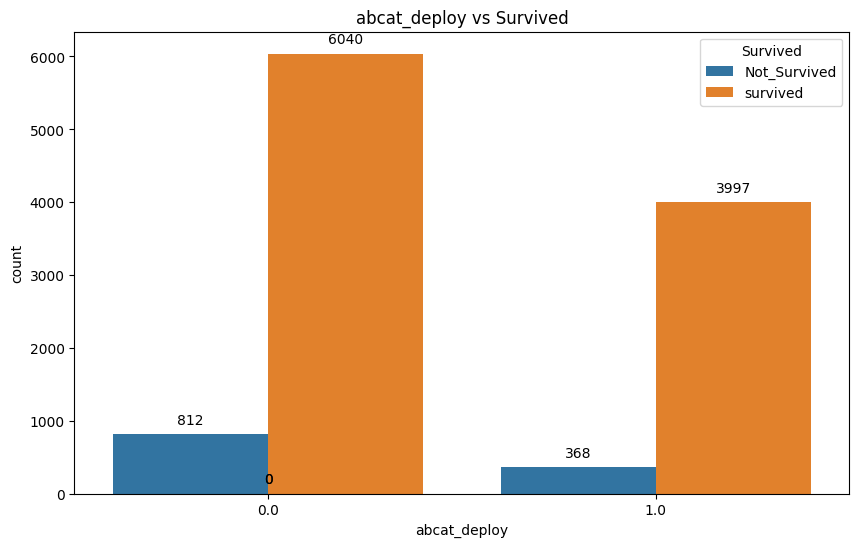

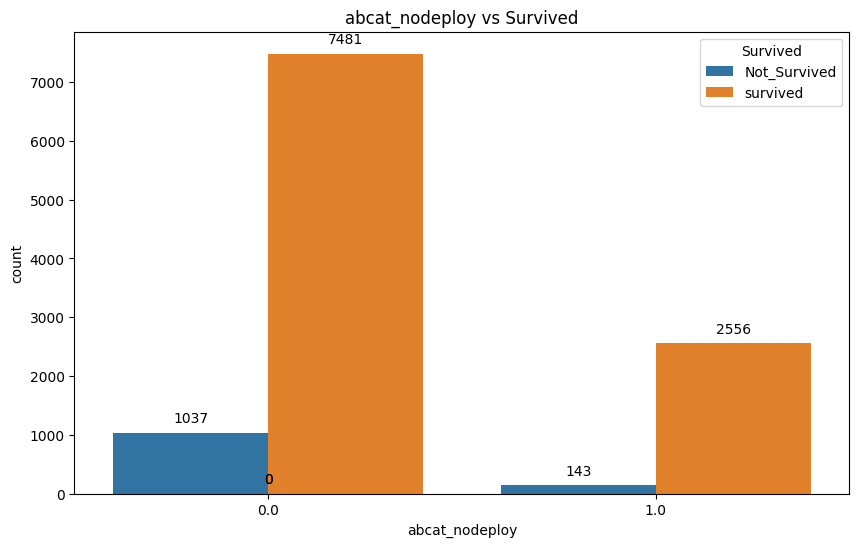

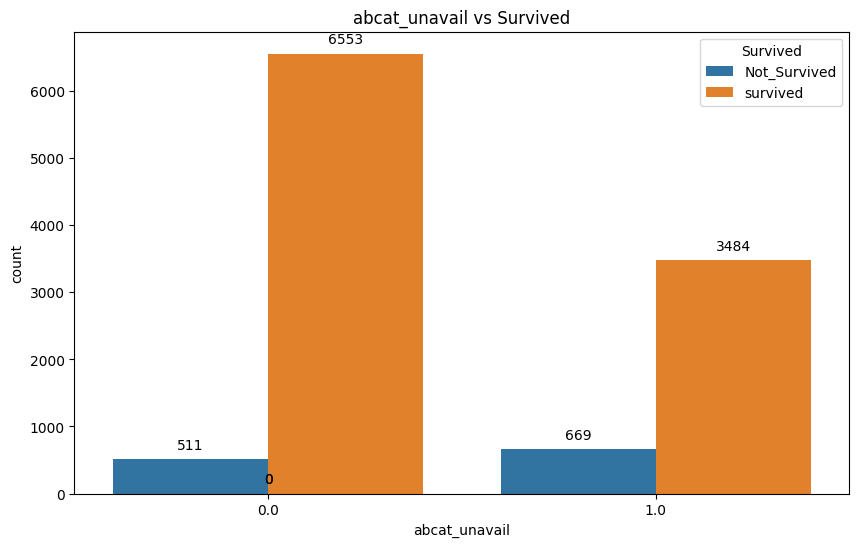

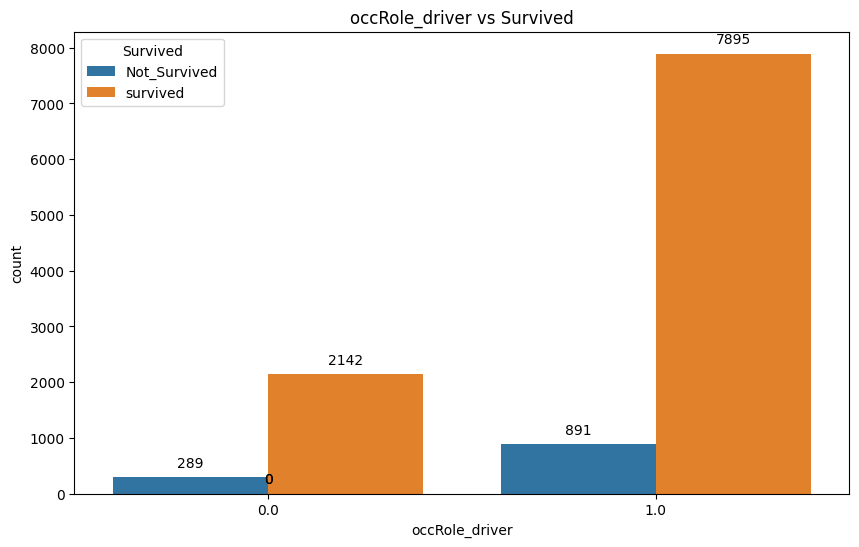

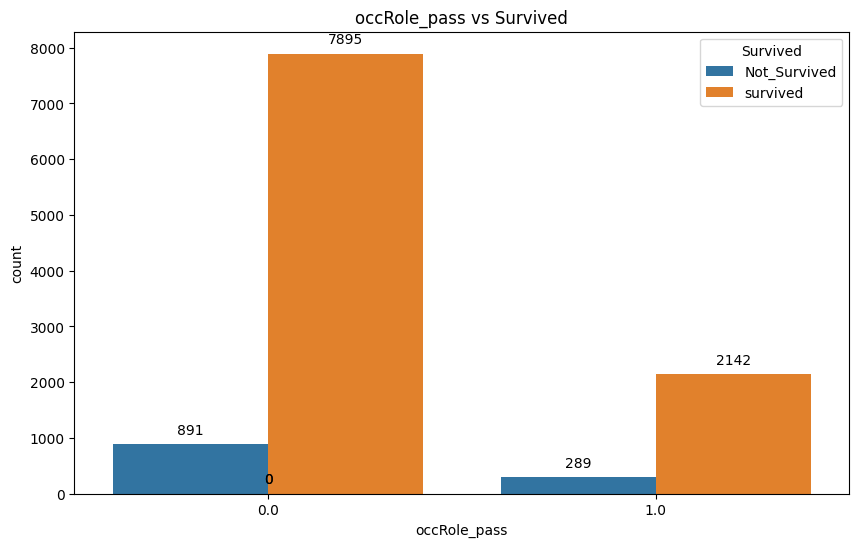

In [ ]:

# Explore the relationship between categorical features and the target variable
for feature in encoded_features:
    plt.figure(figsize=(10, 6))
    plot= sns.countplot(data=data, x=feature, hue=y)
    plt.title(f'{feature} vs Survived')
    for p in plot.patches:
      plt.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points')
    plt.show()


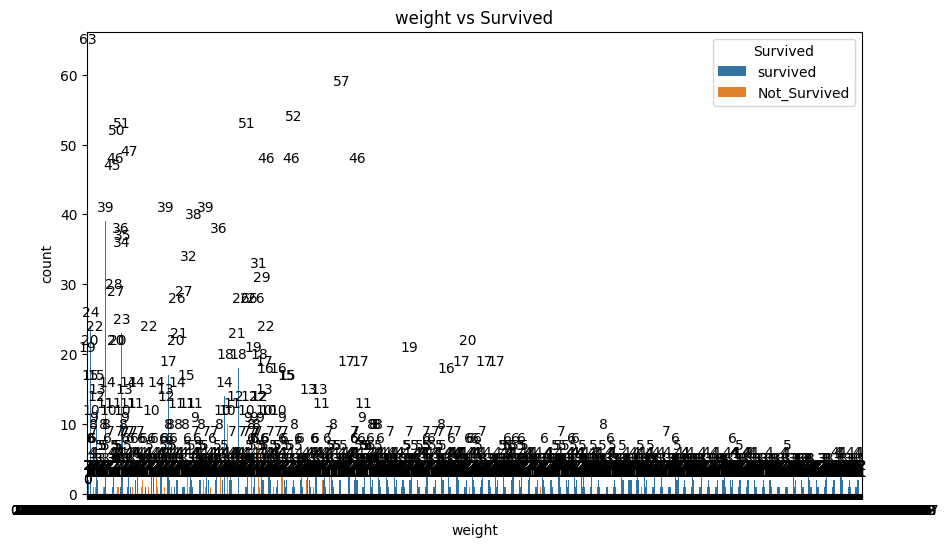

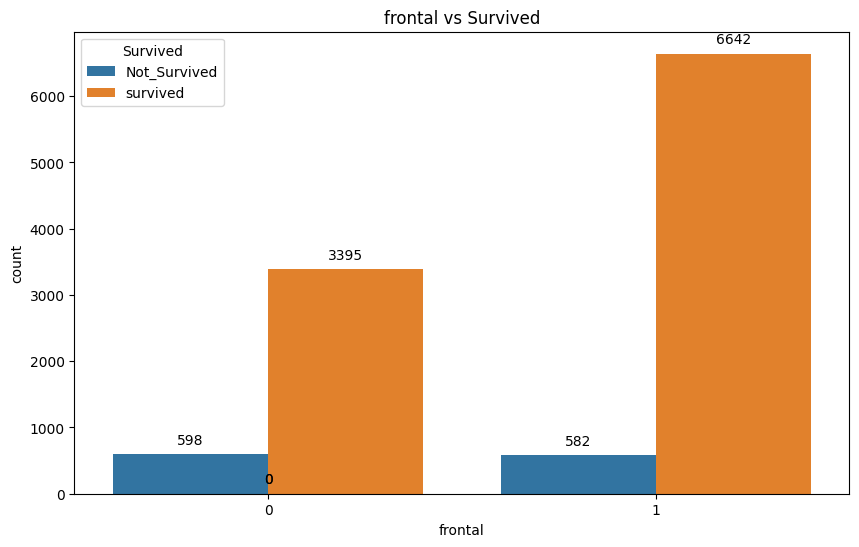

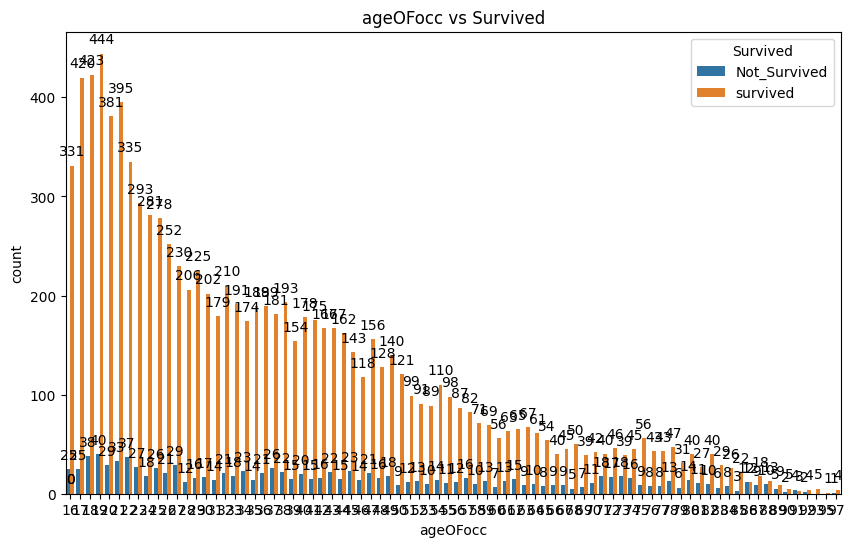

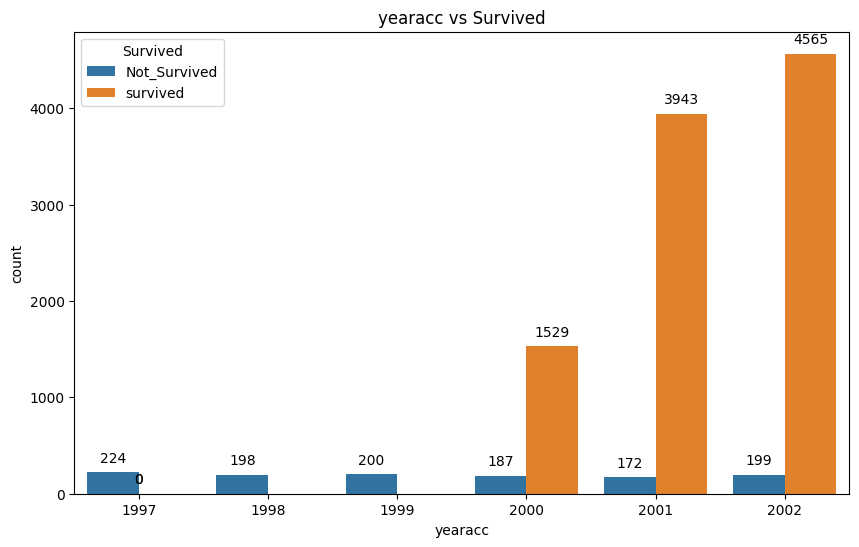

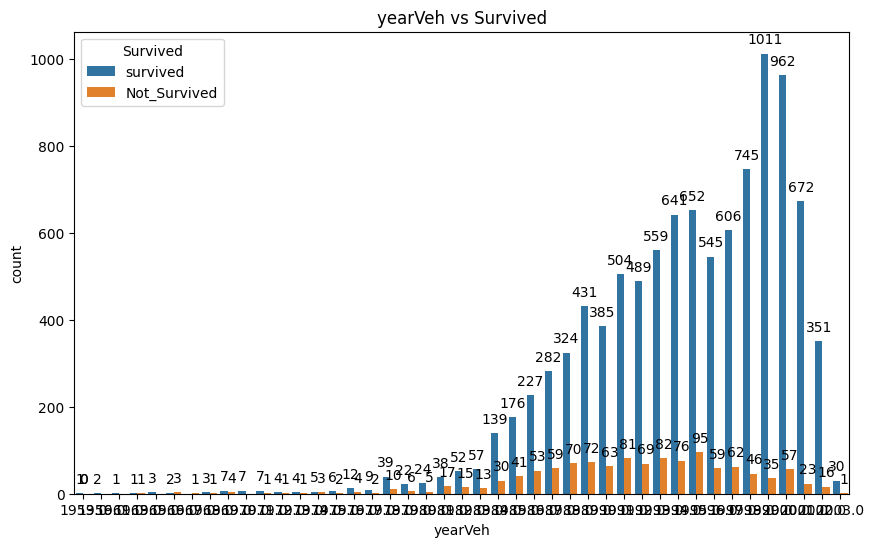

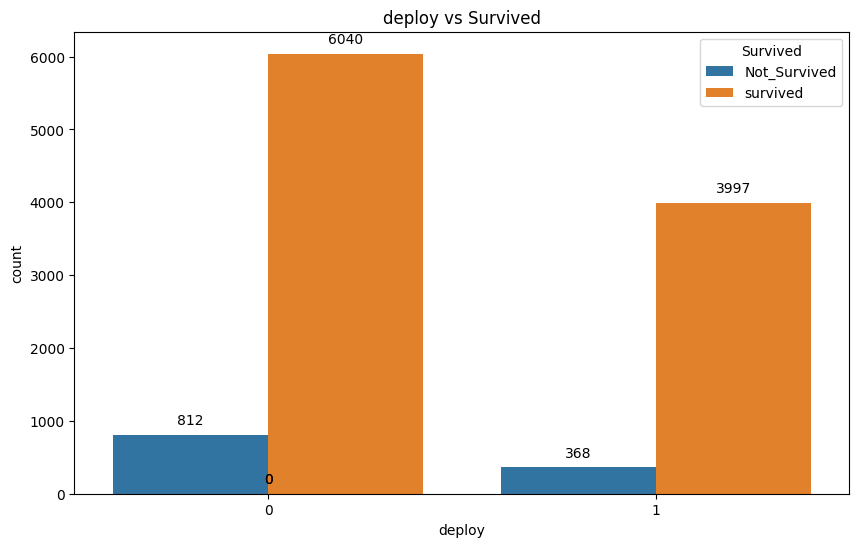

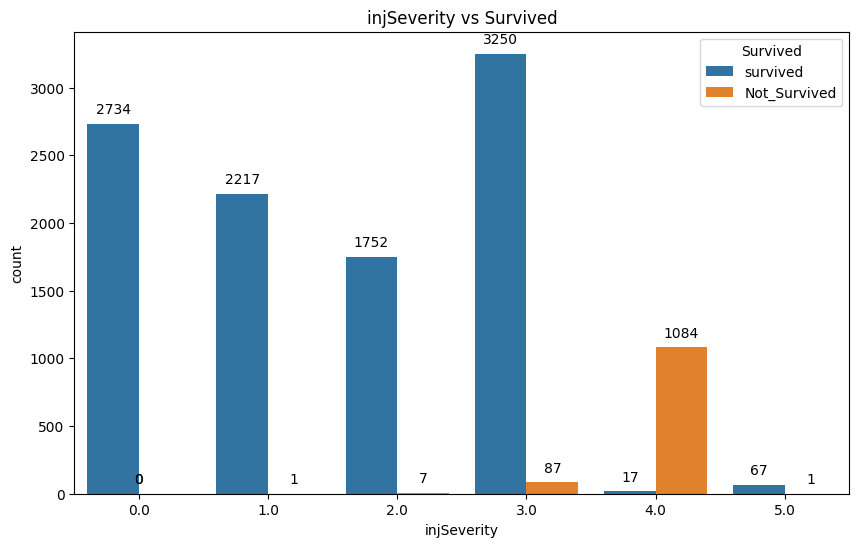

In [ ]:
# Explore the relationship between categorical features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    plot= sns.countplot(data=data, x=feature, hue=y)
    plt.title(f'{feature} vs Survived')
    for p in plot.patches:
      plt.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points')
    plt.show()

0
Logistic Regression Accuracy: 0.9818775995246584
Logistic Regression Confusion Matrix:
[[ 317   41]
 [  20 2988]]


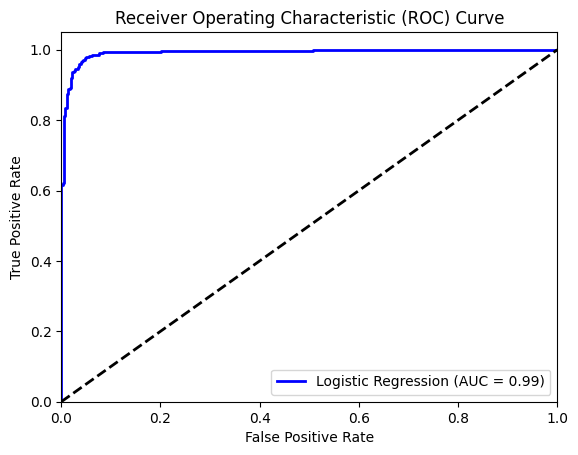

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

X = data
# Encode the target variable
#y = y.map({'Not_Survived': 0, 'Survived': 1})
print(y.isnull().sum())
y = y.fillna(y.mode()[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing for numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Build Logistic Regression model
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression(max_iter=1000))])

logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

# ROC Curve and ROC-AUC score
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


LDA Accuracy: 0.9595959595959596
LDA Confusion Matrix:
[[ 261   97]
 [  39 2969]]


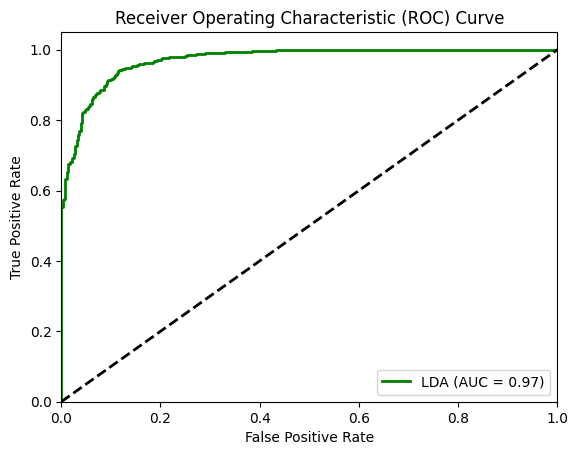

In [ ]:
# Build LDA model
lda = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearDiscriminantAnalysis())])

lda.fit(X_train, y_train)

# Predictions
y_pred_lda = lda.predict(X_test)
y_prob_lda = lda.predict_proba(X_test)[:, 1]

# Accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Accuracy:", accuracy_lda)

# Confusion Matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)
print("LDA Confusion Matrix:")
print(cm_lda)

# ROC Curve and ROC-AUC score
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_prob_lda)
roc_auc_lda = roc_auc_score(y_test, y_prob_lda)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_lda, tpr_lda, color='green', lw=2, label='LDA (AUC = %0.2f)' % roc_auc_lda)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
